## Compute entropy and conditional entropy

In [5]:
from sklearn.metrics import mutual_info_score
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(f'Air2UG_alltimeseries_Toolik_MERRA2data.csv',header=0)
soil_temp_columns = ['T0','T16','T31','T46','T76','T97']

# Extract time info
df['Date'] = df['Date'].apply(pd.to_datetime, errors='coerce')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

remote_sensing_features = ['Day','Month','Year'] + ['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP']

# Define a function to calculate entropy
def calculate_entropy(variable):
    # First we discretize the continuous variables into bins
    # The number of bins is set to the square root of the number of unique values, a common heuristic
    counts, _ = np.histogram(variable, bins='auto')
    # Normalize the counts to get a probability distribution
    p = counts / counts.sum()
    # Calculate the entropy
    entropy = -np.sum(p * np.log2(p + 1e-9))  # add a small value to prevent log(0)
    return entropy

# Calculate entropy for each remote sensing feature
entropies = {feature: calculate_entropy(df[feature]) for feature in soil_temp_columns}

# Calculate conditional entropy for soil temperatures given each remote sensing feature
# We will use mutual information and the formula H(X|Y) = H(X) - I(X;Y)
# where H is entropy, I is mutual information
conditional_entropies = {}
for soil_temp in soil_temp_columns:
    soil_temp_entropy = calculate_entropy(df[soil_temp])
    for feature in remote_sensing_features:
        mutual_info = mutual_info_regression(df[[feature]], df[soil_temp])[0]
        conditional_entropy = soil_temp_entropy - mutual_info
        conditional_entropies[(soil_temp, feature)] = conditional_entropy

/home/mohamed.ahajjam/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/mohamed.ahajjam/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/mohamed.ahajjam/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/mohamed.ahajjam/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version

/home/mohamed.ahajjam/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/mohamed.ahajjam/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/mohamed.ahajjam/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/mohamed.ahajjam/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version

/home/mohamed.ahajjam/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/mohamed.ahajjam/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/mohamed.ahajjam/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/mohamed.ahajjam/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version

/home/mohamed.ahajjam/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/mohamed.ahajjam/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/mohamed.ahajjam/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/mohamed.ahajjam/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version

/home/mohamed.ahajjam/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/mohamed.ahajjam/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/mohamed.ahajjam/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/mohamed.ahajjam/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version

/home/mohamed.ahajjam/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/mohamed.ahajjam/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/mohamed.ahajjam/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/mohamed.ahajjam/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version

/home/mohamed.ahajjam/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/mohamed.ahajjam/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/mohamed.ahajjam/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/mohamed.ahajjam/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version

/home/mohamed.ahajjam/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mohamed.ahajjam/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mohamed.ahajjam/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mohamed.ahajjam/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(d

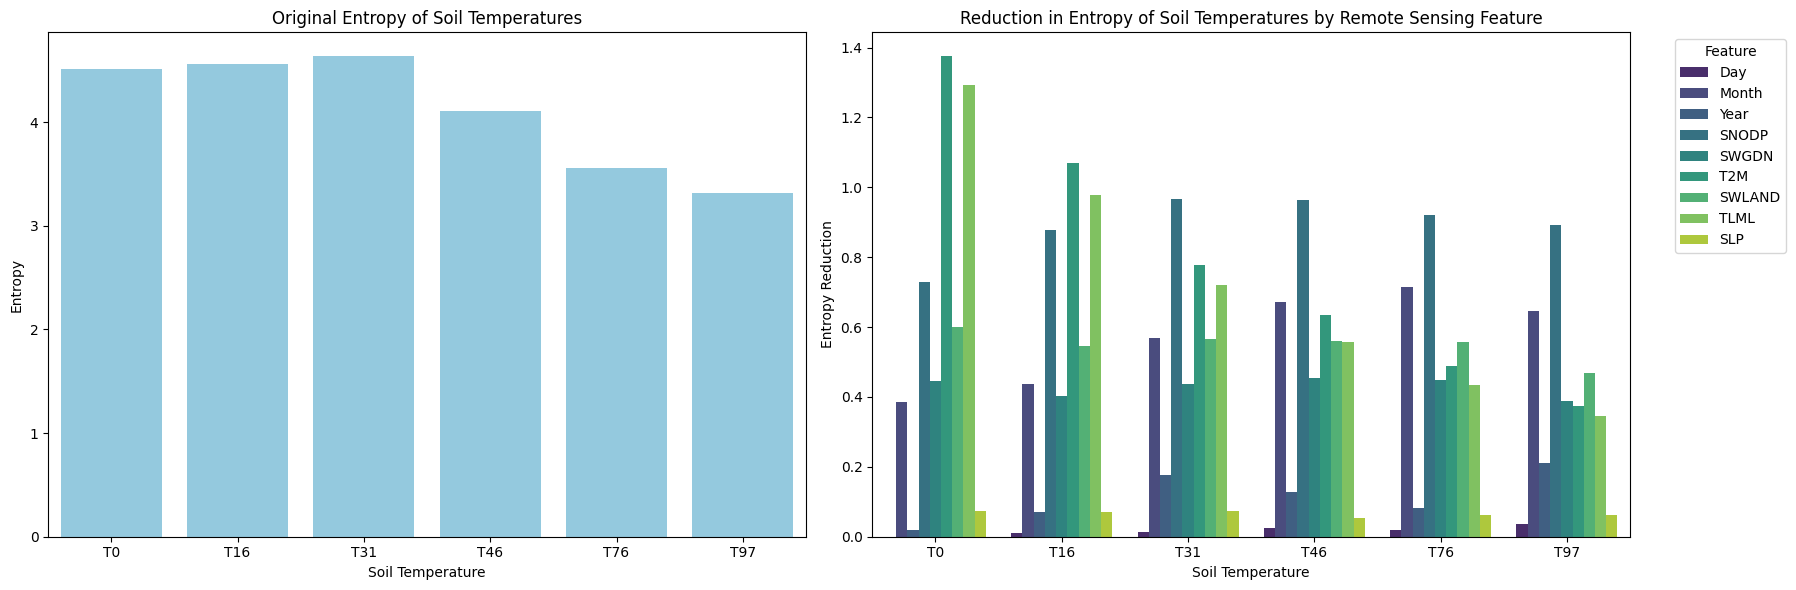

,Date,Tair,T0,T8,T16,T23,T31,T38,T46,T61,...,TLML,TSH,EVPSOIL,LWLAND,TS,QV2M,SLP,Year,Month,Day
0,2000-01-01,-23.570833,-20.590833,-16.600833,-13.566667,-12.496667,-11.880417,-10.997917,-10.276250,-9.123333,...,-26.564551,-28.508063,0.0,-24.548771,-28.508673,0.000304,102747.171875,2000,1,1
1,2000-01-02,-26.929583,-20.388750,-16.039583,-13.046667,-12.066250,-11.540000,-10.781667,-10.152500,-9.127500,...,-26.423911,-29.612433,0.0,-19.873007,-29.612051,0.000306,102558.156250,2000,1,2
2,2000-01-03,-30.194167,-23.720833,-17.707500,-13.665000,-12.415417,-11.740000,-10.872083,-10.207083,-9.167917,...,-26.514777,-42.817953,0.0,-21.266411,-42.819632,0.000261,102112.085938,2000,1,3
3,2000-01-04,-32.678333,-25.611250,-18.949167,-14.417500,-13.018333,-12.226667,-11.247083,-10.501250,-9.361667,...,-27.379980,-39.687277,0.0,-13.013476,-39.689627,0.000229,101606.335938,2000,1,4
4,2000-01-05,-33.580000,-25.935417,-19.502917,-14.986667,-13.555000,-12.720417,-11.680417,-10.876250,-9.651667,...,-28.848532,-37.192175,0.0,-14.391212,-37.193289,0.000201,101824.546875,2000,1,5


In [6]:
# Create a DataFrame from the original entropies for ease of plotting
df_original_entropies = pd.DataFrame(list(entropies.items()), columns=['Soil Temp', 'Original Entropy'])

# Create a DataFrame from the conditional entropies provided for ease of plotting
df_conditional_entropies = pd.DataFrame({
    'Soil Temp': [k[0] for k in conditional_entropies.keys()],
    'Feature': [k[1] for k in conditional_entropies.keys()],
    'Conditional Entropy': list(conditional_entropies.values())
})

# Calculate the reduction in entropy
df_conditional_entropies = df_conditional_entropies.join(
    df_original_entropies.set_index('Soil Temp'), on='Soil Temp')
df_conditional_entropies['Entropy Reduction'] = df_conditional_entropies['Original Entropy'] - df_conditional_entropies['Conditional Entropy']
# Export file
df_conditional_entropies.to_csv('Entropies_ConditionalEntropies_Toolik.csv', index=False)

# Now let's plot the original and conditional entropies
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Original entropy bar plot
sns.barplot(ax=axes[0], x='Soil Temp', y='Original Entropy', data=df_original_entropies, color='skyblue')
axes[0].set_title('Original Entropy of Soil Temperatures')
axes[0].set_ylabel('Entropy')
axes[0].set_xlabel('Soil Temperature')

# Entropy reduction bar plot
sns.barplot(ax=axes[1], x='Soil Temp', y='Entropy Reduction', hue='Feature', data=df_conditional_entropies, palette='viridis')
axes[1].set_title('Reduction in Entropy of Soil Temperatures by Remote Sensing Feature')
axes[1].set_ylabel('Entropy Reduction')
axes[1].set_xlabel('Soil Temperature')
axes[1].legend(title='Feature', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

df.head()

In [19]:
# !pip install --upgrade orjson
# !pip install --upgrade pip setuptools
# ! pip install --upgrade jsonschema
# !pip install --upgrade platformdirs
# !pip install pycaret

loc = 'Toolik'
sequence_length = 1
features = ['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP']
target= 'T0'
res = 30
season = 'Winter'
_, _, df = prepare_sequences(loc, sequence_length, target, features, season, res)
# Split into train and test sets
train_size = int(len(df) * 0.8)
# Split the data chronologically
train_df = df.iloc[:train_size]
test_df = df.iloc[train_size:]


from pycaret.regression import *
s = setup(train_df, target = 'T0', session_id = 123, use_gpu = True)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Tesla V100-SXM2-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more lea

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Tesla V100-SXM2-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more lea

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Tesla V100-SXM2-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more lea

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Tesla V100-SXM2-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more lea

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Tesla V100-SXM2-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more lea

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Tesla V100-SXM2-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more lea

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Tesla V100-SXM2-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more lea

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Tesla V100-SXM2-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more lea

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Tesla V100-SXM2-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more lea

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Tesla V100-SXM2-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more lea

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Tesla V100-SXM2-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more lea

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Tesla V100-SXM2-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more lea

,Description,Value
0,Session id,123
1,Target,T0
2,Target type,Regression
3,Original data shape,"(1191, 10)"
4,Transformed data shape,"(1191, 10)"
5,Transformed train set shape,"(833, 10)"
6,Transformed test set shape,"(358, 10)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,simple


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Tesla V100-SXM2-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more lea

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Tesla V100-SXM2-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more lea

In [28]:
# Compare different models to find the best one
best_3models = compare_models(n_select = 3)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.3640,0.4349,0.6354,0.9821,0.0331,0.0209,0.1180
lightgbm,Light Gradient Boosting Machine,0.5934,0.8694,0.9133,0.9614,0.0502,0.0350,0.4890
rf,Random Forest Regressor,0.6158,0.9703,0.9668,0.9587,0.0532,0.0364,0.1160
gbr,Gradient Boosting Regressor,0.9008,1.5424,1.2337,0.9316,0.0688,0.0534,0.1570
dt,Decision Tree Regressor,0.6397,2.1443,1.3491,0.9107,0.0716,0.0369,0.0140
ada,AdaBoost Regressor,2.0255,5.7409,2.3930,0.7418,0.1324,0.1216,0.0990
lr,Linear Regression,2.1483,7.5805,2.7474,0.6615,0.1436,0.1236,0.0110
br,Bayesian Ridge,2.1493,7.5845,2.7479,0.6615,0.1436,0.1238,0.0110
ridge,Ridge Regression,2.1635,7.6729,2.7632,0.6581,0.1447,0.1249,0.0100
lasso,Lasso Regression,2.5148,9.8475,3.1279,0.5615,0.1684,0.1489,0.0100


In [42]:
blnd_models = stack_models(best_3models, choose_better=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4588,0.5132,0.7164,0.9790,0.0414,0.0274
1,0.3429,0.2458,0.4958,0.9894,0.0281,0.0206
2,0.4565,1.1992,1.0951,0.9657,0.0421,0.0215
3,0.3132,0.2024,0.4499,0.9900,0.0221,0.0172
4,0.3371,0.2758,0.5252,0.9875,0.0279,0.0196
5,0.3838,0.2902,0.5387,0.9900,0.0257,0.0194
6,0.3566,0.3524,0.5937,0.9830,0.0281,0.0194
7,0.3294,0.1951,0.4417,0.9876,0.0265,0.0206
8,0.3715,0.2711,0.5207,0.9837,0.0323,0.0233


In [43]:
predictions = predict_model(blnd_models, data=test_df)
predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Stacking Regressor,2.5155,8.0736,2.8414,0.3052,0.1493,0.1385


,SNODP,SWGDN,T2M,SWLAND,TLML,SLP,Year,Month,Day,T0,prediction_label
1191,0.542676,5.747317,-28.040482,2.445236,-25.288418,101819.585938,2013,2,2,-22.919069,-23.750349
1192,0.543722,6.295037,-27.916798,2.675132,-25.233812,101779.484375,2013,2,3,-22.829681,-23.054210
1193,0.544885,6.935750,-27.969452,2.945383,-25.434784,101752.000000,2013,2,4,-22.821472,-24.446161
1194,0.546115,7.812706,-28.285040,3.320143,-25.904675,101749.203125,2013,2,5,-23.104736,-26.178059
1195,0.547260,8.807284,-28.893335,3.746693,-26.554148,101720.218750,2013,2,6,-23.492889,-27.909937


In [78]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

loc = 'Toolik'
sequence_length = 1
features = ['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP']
target= 'T0'
res = 30
season = 'Winter'
X, y, _ = prepare_sequences(loc, sequence_length, target, features, season, res)
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Split into train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[2])).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(-1, X_test.shape[2])).reshape(X_test.shape)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# Attention-based regression model
class AttentionRegressor(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(AttentionRegressor, self).__init__()
        self.attention = nn.Linear(input_dim, input_dim)
        self.relu = nn.ReLU()
        self.hidden_layers = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU()
        )
        self.output = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Apply attention
        attention_weights = torch.softmax(self.attention(x), dim=-1)
        x = x * attention_weights
        
        # Feed through network
        x = self.hidden_layers(x)
        x = self.output(x)
        return x

# Model initialization
input_dim = X_train.shape[2]
hidden_dim = 4192  # Adjust as necessary
output_dim = 1
model = AttentionRegressor(input_dim, hidden_dim, output_dim)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9, nesterov=True)

# Training the model
epochs = 200
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train).squeeze()
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# Evaluate the model on the training set
model.eval()
with torch.no_grad():
    y_train_pred = model(X_train).squeeze()
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    print(f'Train RMSE: {train_rmse}')

# Evaluate the model on the testing set
with torch.no_grad():
    y_pred = model(X_test).squeeze()
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f'Test RMSE: {test_rmse}')


Epoch 0, Loss: 348.4927978515625
Epoch 10, Loss: 304.8775329589844
Epoch 20, Loss: 249.3015899658203
Epoch 30, Loss: 25.729082107543945
Epoch 40, Loss: 97.03080749511719
Epoch 50, Loss: 19.73333168029785
Epoch 60, Loss: 141.3456268310547
Epoch 70, Loss: 103.43059539794922
Epoch 80, Loss: 51.37699890136719
Epoch 90, Loss: 14.568145751953125
Epoch 100, Loss: 9.537269592285156
Epoch 110, Loss: 14.908127784729004
Epoch 120, Loss: 7.3258585929870605
Epoch 130, Loss: 6.123633861541748
Epoch 140, Loss: 5.243969440460205
Epoch 150, Loss: 4.3145670890808105
Epoch 160, Loss: 3.4659883975982666
Epoch 170, Loss: 3.351386308670044
Epoch 180, Loss: 2.673105001449585
Epoch 190, Loss: 2.251405954360962
Train RMSE: 1.4739702939987183
Test RMSE: 6.725282192230225


In [122]:
loc = 'Toolik'
sequence_length = 1
features = ['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP']
target= 'T0'
res = 30
season = 'Winter'
_, _, df = prepare_sequences(loc, sequence_length, target, features, season, res)
# Split into train and test sets
train_size = int(len(df) * 0.8)
# Split the data chronologically
train_df = df.iloc[:train_size]
test_df = df.iloc[train_size:]

features = ['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP','Year','Month','Day']

# prepare the data
wide_preprocessor = WidePreprocessor(wide_cols=wide_cols, crossed_cols=crossed_cols)
X_wide = wide_preprocessor.fit_transform(df_train)

tab_preprocessor = TabPreprocessor(
    cat_embed_cols=cat_embed_cols, continuous_cols=continuous_cols  # type: ignore[arg-type]
)
X_tab = tab_preprocessor.fit_transform(df_train)

# build the model
wide = Wide(input_dim=np.unique(X_wide).shape[0], pred_dim=1)
tab_mlp = TabMlp(
    column_idx=tab_preprocessor.column_idx,
    cat_embed_input=tab_preprocessor.cat_embed_input,
    continuous_cols=continuous_cols,
)
model = WideDeep(wide=wide, deeptabular=tab_mlp)


# Preprocess the data for continuous features
tab_preprocessor = TabPreprocessor(continuous_cols=features)
train_processed = tab_preprocessor.fit_transform(train_df)
test_processed = tab_preprocessor.transform(test_df)

# Extract the processed features and target for training and testing
X_train_processed = train_processed[:, :-1]
y_train = train_processed[:, -1]
X_test_processed = test_processed[:, :-1]
y_test = test_processed[:, -1]

# Define the TabMlp model
tab_mlp = TabMlp(column_idx=tab_preprocessor.column_idx, 
                 continuous_cols=features,
                 mlp_hidden_dims=[64, 32])  # Adjust the hidden dimensions as necessary

# Configure the trainer
trainer = Trainer(model=tab_mlp, objective="regression")

# Train the model
trainer.fit(X_train=X_train_processed, target=y_train, n_epochs=10, batch_size=32)

# Make predictions and evaluate the model
y_pred = trainer.predict(X_test_processed)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE: {rmse}")


[rank: 0] Seed set to 42
Trainer will use only 1 of 8 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=8)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Exception in thread Exception ignored in: <function _ConnectionBase.__del__ at 0x15547b1dd4c0>
Traceback (most recent call last):
  File "/cm/local/apps/python39/lib/python3.9/multiprocessing/connection.py", line 132, in __del__
QueueFeederThread:
Traceback (most recent call last):
  File "/cm/local/apps/python39/lib/python3.9/multiprocessing/queues.py", line 239, in _feed
    reader_close()
  File "/cm/local/apps/python39/lib/python3.9/multiprocessing/connection.py", line 177, in close
    self._close()
  File "/cm/local/apps/python39/l

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

TypeError: Caught TypeError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/home/mohamed.ahajjam/.local/lib/python3.9/site-packages/torch/utils/data/_utils/worker.py", line 308, in _worker_loop
    data = fetcher.fetch(index)
  File "/home/mohamed.ahajjam/.local/lib/python3.9/site-packages/torch/utils/data/_utils/fetch.py", line 54, in fetch
    return self.collate_fn(data)
  File "/home/mohamed.ahajjam/.local/lib/python3.9/site-packages/torch/utils/data/_utils/collate.py", line 265, in default_collate
    return collate(batch, collate_fn_map=default_collate_fn_map)
  File "/home/mohamed.ahajjam/.local/lib/python3.9/site-packages/torch/utils/data/_utils/collate.py", line 142, in collate
    return [collate(samples, collate_fn_map=collate_fn_map) for samples in transposed]  # Backwards compatibility.
  File "/home/mohamed.ahajjam/.local/lib/python3.9/site-packages/torch/utils/data/_utils/collate.py", line 142, in <listcomp>
    return [collate(samples, collate_fn_map=collate_fn_map) for samples in transposed]  # Backwards compatibility.
  File "/home/mohamed.ahajjam/.local/lib/python3.9/site-packages/torch/utils/data/_utils/collate.py", line 142, in collate
    return [collate(samples, collate_fn_map=collate_fn_map) for samples in transposed]  # Backwards compatibility.
  File "/home/mohamed.ahajjam/.local/lib/python3.9/site-packages/torch/utils/data/_utils/collate.py", line 142, in <listcomp>
    return [collate(samples, collate_fn_map=collate_fn_map) for samples in transposed]  # Backwards compatibility.
  File "/home/mohamed.ahajjam/.local/lib/python3.9/site-packages/torch/utils/data/_utils/collate.py", line 150, in collate
    raise TypeError(default_collate_err_msg_format.format(elem_type))
TypeError: default_collate: batch must contain tensors, numpy arrays, numbers, dicts or lists; found <class 'NoneType'>


In [139]:
df

,SNODP,SWGDN,T2M,SWLAND,TLML,SLP,Year,Month,Day,T0
0,0.463095,0.438971,-23.080234,0.194240,-20.556509,101039.265885,2000,1,16,-18.331431
1,0.465450,0.496024,-23.193878,0.218241,-20.721169,100951.714844,2000,1,17,-18.283194
2,0.468565,0.596560,-23.314572,0.261882,-20.896520,100861.221094,2000,1,18,-18.231236
3,0.471880,0.662519,-23.136095,0.289177,-20.763220,100785.919271,2000,1,19,-18.061153
4,0.475214,0.816875,-22.426599,0.356429,-20.121811,100743.483854,2000,1,20,-17.552069
...,...,...,...,...,...,...,...,...,...,...
1484,0.457069,34.522049,-16.051936,15.207806,-12.377654,100551.669010,2016,2,25,-12.941386
1485,0.456912,35.534936,-16.059590,15.632955,-12.484593,100481.438021,2016,2,26,-13.087914
1486,0.456921,36.464579,-15.935733,16.018229,-12.429766,100457.913021,2016,2,27,-13.002636
1487,0.457106,37.389386,-16.097779,16.397680,-12.670831,100483.828385,2016,2,28,-13.406665


In [141]:
_, _, df = prepare_sequences(loc, sequence_length, target, features, season, res)

X, y = df2xy(df, sample_col=df.index, feat_col=['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP'], target_col='T0', data_cols=None)


KeyError: 0

In [136]:
from tsai.all import *

loc = 'Toolik'
sequence_length = 1
features = ['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP']
target= 'T0'
res = 30
season = 'Winter'
X, y, df = prepare_sequences(loc, sequence_length, target, features, season, res)
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Split into train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

X, y, splits = combine_split_data([X_train, X_test], [y_train, y_test])
tfms  = [None, [TSRegression()]]
dsets = TSDatasets(X, y, tfms=tfms, splits=splits, inplace=True)
dls   = TSDataLoaders.from_dsets(dsets.train, dsets.valid, bs=1048)
set_seed(2)
splits

((#1191) [0,1,2,3,4,5,6,7,8,9...],
 (#298) [1191,1192,1193,1194,1195,1196,1197,1198,1199,1200...])

In [118]:
from sklearn.preprocessing import OrdinalEncoder
from fastai.callback.all import *

seed = 42
par = {}
models = {'InceptionTimePlus','TSTPlus','XCMPlus','LSTMPlus','GRUPlus'}#,'MiniRocketPlus',
output_inputs = 'T0_TimeTair'
location = 'Deadhorse'
mode = ['T0'] #'T0','T_02','T_07','T_12','T_22','T_32','T76','T_62','T_67','T97'

freeze_epoch = 100

season1 = location

def get_dayofweek(x):
    return x.dayofweek    
def get_month(x):
    return x.month    
def get_year(x):
    return x.year    

iind = [3,6,9,12,18]#,18
ind2 = ''

tbl = pd.DataFrame(columns=['input', 'model', 'total params', 'train loss', 'valid loss', 'rmse_val', 'rmse_test', 'time'])

tbl_ind = 0
for II in range(len(iind)):
    ind = str(iind[II]) + 'days_'
    print("************************************\n ind:",ind,":")
    for key in models:
        exec('model_name = {}'.format(key)) 
        print("*",model_name.__name__,":")
        df = pd.read_csv(f'Air2UG_alltimeseries_Deadhorse_MERRA2data.csv')
        # print('Processing Tair & output data..')
        from sklearn.model_selection import train_test_split
        from sklearn.preprocessing import StandardScaler
        col = ['Signal']
        row = ["feature{}".format(x) for x in np.array(range(4))] #Change this number to higher if necessary!
        scalersIN = pd.DataFrame([], columns = col, index = row)
        scalersOUT = pd.DataFrame([], columns = col, index = [0])
        from sklearn.preprocessing import OrdinalEncoder
        test_targetdata={}
        test_predsdata={}
        #read TS data as datetime
        cols = TS.columns[:]
        TS[cols] = TS[cols].apply(pd.to_datetime, errors='coerce')
        TS_data = TS.iloc[:,:] # Train set 
        TS_D = TS_data.applymap(get_dayofweek)
        TS_M = TS_data.applymap(get_month)
        TS_Y = TS_data.applymap(get_year)

        # define ordinal encoding
        encoder_D = OrdinalEncoder()
        encoder_M = OrdinalEncoder()
        encoder_Y = OrdinalEncoder()
        # transform data
        TS_D = to3d(encoder_D.fit_transform(TS_D))
        TS_M = to3d(encoder_M.fit_transform(TS_M))
        TS_Y = to3d(encoder_Y.fit_transform(TS_Y))

        # print('splitting data..')
        Tair = to3d(Tair.iloc[:,:].values)
        T0_data = to3d(T0.values)
        T0_data = T0_data[:,:,-1]
        data_X = np.concatenate([Tair[:,:,:], TS_D[:,:,:], TS_M[:,:,:], TS_Y[:,:,:]],axis=1)   #[TS_D[:,:,:], TS_M[:,:,:], TS_Y[:,:,:]],axis=1)    
        data_y = T0_data[:,:]#T0_data[:,0,:]
        X_train, X_test = data_X[:int((Tair.shape[0])-(Tair.shape[0])*20/100)], data_X[-int((Tair.shape[0])*20/100):]
        y_train, y_test = data_y[:int((Tair.shape[0])-(Tair.shape[0])*20/100)], data_y[-int((Tair.shape[0])*20/100):]
        
        # print('Standardizing data..')
        for i in range(X_train.shape[1]): #normalize IN data
            scalersIN['Signal']["feature{}".format(i)] = StandardScaler()
            X_train[:, i, :] = scalersIN['Signal']["feature{}".format(i)].fit_transform(X_train[:, i, :])    
        scalersOUT['Signal'] = StandardScaler() #normalize OUT data
        y_train = scalersOUT['Signal'][0].fit_transform(y_train.reshape(-1, 1)) #remove .reshape(-1, 1) in case! 
        print('training set: ',X_train.shape, y_train.shape, ', testing set: ',X_test.shape, y_test.shape)
        splits = get_splits(y_train, valid_size=.2, stratify=False, random_state=seed, shuffle=True)
        tfms  = [None, [TSRegression()]]
        dsets = TSDatasets(X_train, y_train, tfms=tfms, splits=splits, inplace=True)
        dls   = TSDataLoaders.from_dsets(dsets.train, dsets.valid, bs=1048)
        set_seed(seed)
        
        #**************#**************#**************#**************#**************#**************#**************#**************
        study = optuna.create_study(direction='minimize')
        print(f"Sampler is {study.sampler.__class__.__name__}")

        tuning(model_name)

        print("**Study statistics: ")
        print("  Number of finished trials: ", len(study.trials))

        print("Best trial:")
        trial = study.best_trial

        print("  Value: ", trial.value)

        print("  Params: ")
        for key, value in trial.params.items():
            print("{}".format(value))

        ### Model learning
        # Get the best nf and dropout rate from the best trial object
        trial = study.best_trial
        for key, value in trial.params.items():
            if  key != 'act' and key != 'wavelet':
                exec('{} = {}'.format(key,value))
            if key == 'act':
                exec("act = '%s'" % (value))
            if key == 'wavelet':
                exec("wavelet = '%s'" % (value))

        par = tuned_hyperparameters(model_name)
        
        #Model learning
        learn = TSForecaster(X_train, y_train, splits=splits, tfms=tfms,
                             bs=1042, arch=model_name,
                             arch_config=par, metrics=[mae, rmse],
                             cbs=[],#ShowGraph(),SaveModel(),EarlyStoppingCallback(monitor='_rmse', comp=np.less,min_delta=0.0001, patience=6)
                             seed=seed)
        lr = learn.lr_find()
        learning_rate = lr.valley
        plt.show()
        
        start = time.time()
        learn.fit_one_cycle(freeze_epoch, learning_rate)
        elapsed = time.time() - start
        
        vals = learn.recorder.values[-1]
        
        valid_dl = dls.valid

        # Labeled test data
        for i in range(X_test.shape[1]): #normalize IN data
            X_test[:, i, :] = scalersIN['Signal']["feature{}".format(i)].transform(X_test[:, i, :])    
        y_test = scalersOUT['Signal'][0].transform(y_test)  
        test_ds = valid_dl.dataset.add_test(X_test, y_test)
        test_dl = valid_dl.new(test_ds)
        _, temp_targets, temp_preds = learn.get_preds(dl=test_dl, with_decoded=True, save_preds=None, save_targs=None)
        #denormalize data
        test_predsdata = scalersOUT['Signal'][0].inverse_transform(temp_preds)  
        test_targetdata = scalersOUT['Signal'][0].inverse_transform(temp_targets)    
        del temp_targets, temp_preds
        d = pd.DataFrame(test_targetdata)
        dp = pd.DataFrame(test_predsdata)

        RMSE = np.sqrt(np.square(np.subtract(d,dp)).mean(axis=0))
        print("Root Mean Square Error:", RMSE.mean())

        results = pd.concat([d, dp],axis = 1)

        # Write the results to a CSV file
        results.to_csv('export3/SinglePrediction' + output_inputs + '_' + str(model_name.__name__.replace('()', '')) + ind + 'results.csv', index=False)  

        tbl.loc[tbl_ind] = [int(iind[II]), model_name.__name__, count_parameters(learn, model_name), vals[0], vals[1], vals[3], RMSE[0], float(elapsed)]
        tbl.sort_values(by='input', ascending=False, kind='stable', ignore_index=True, inplace=True)
        clear_output()
        tbl_ind += 1

display(tbl)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]


TypeError: Caught TypeError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/home/mohamed.ahajjam/.local/lib/python3.9/site-packages/torch/utils/data/_utils/worker.py", line 308, in _worker_loop
    data = fetcher.fetch(index)
  File "/home/mohamed.ahajjam/.local/lib/python3.9/site-packages/torch/utils/data/_utils/fetch.py", line 54, in fetch
    return self.collate_fn(data)
  File "/home/mohamed.ahajjam/.local/lib/python3.9/site-packages/torch/utils/data/_utils/collate.py", line 265, in default_collate
    return collate(batch, collate_fn_map=default_collate_fn_map)
  File "/home/mohamed.ahajjam/.local/lib/python3.9/site-packages/torch/utils/data/_utils/collate.py", line 142, in collate
    return [collate(samples, collate_fn_map=collate_fn_map) for samples in transposed]  # Backwards compatibility.
  File "/home/mohamed.ahajjam/.local/lib/python3.9/site-packages/torch/utils/data/_utils/collate.py", line 142, in <listcomp>
    return [collate(samples, collate_fn_map=collate_fn_map) for samples in transposed]  # Backwards compatibility.
  File "/home/mohamed.ahajjam/.local/lib/python3.9/site-packages/torch/utils/data/_utils/collate.py", line 142, in collate
    return [collate(samples, collate_fn_map=collate_fn_map) for samples in transposed]  # Backwards compatibility.
  File "/home/mohamed.ahajjam/.local/lib/python3.9/site-packages/torch/utils/data/_utils/collate.py", line 142, in <listcomp>
    return [collate(samples, collate_fn_map=collate_fn_map) for samples in transposed]  # Backwards compatibility.
  File "/home/mohamed.ahajjam/.local/lib/python3.9/site-packages/torch/utils/data/_utils/collate.py", line 150, in collate
    raise TypeError(default_collate_err_msg_format.format(elem_type))
TypeError: default_collate: batch must contain tensors, numpy arrays, numbers, dicts or lists; found <class 'NoneType'>


In [121]:
datamodule

NameError: name 'datamodule' is not defined

In [99]:
df.describe()

,Date,Tair,T0,T_02,T_07,T_12,T_22,T_32,T_42,T_62,...,HFLUX,SPEED,TLML,TSH,EVPSOIL,LWLAND,TS,QV2M,SLP,time_idx
count,4987,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000,...,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000
mean,1993-08-02 00:00:00,-12.290935,-5.889772,-5.830465,-5.036799,-6.158672,-5.915271,-5.984969,-6.117933,-6.154309,...,15.354276,7.036751,-9.803949,-7.971310,13.821814,-32.952282,-9.097297,0.002199,101527.826355,2493.000000
min,1986-10-05 00:00:00,-49.000000,-38.800000,-23.950000,-23.250000,-22.640000,-21.320000,-20.740000,-20.300000,-19.450000,...,-54.992355,0.709324,-43.248114,-36.741125,0.000000,-116.264725,-38.630301,0.000090,97474.546875,0.000000
25%,1990-03-04 12:00:00,-24.860000,-14.770000,-14.070000,-13.010000,-13.835000,-13.050000,-12.810000,-12.680000,-12.100000,...,6.032649,4.473168,-19.481779,-16.667441,0.000000,-44.339716,-18.117056,0.000682,100869.179688,1246.500000
50%,1993-08-02 00:00:00,-11.980000,-4.970000,-3.330000,-2.290000,-3.210000,-2.840000,-2.960000,-3.220000,-3.680000,...,13.835920,6.441012,-9.049780,-7.470221,0.000000,-28.136324,-8.713141,0.001653,101492.265625,2493.000000
75%,1996-12-30 12:00:00,1.025000,2.045000,0.985000,1.880000,0.010000,0.100000,-0.010000,-0.120000,-0.480000,...,23.152713,8.994404,0.227106,1.517847,21.689743,-17.075304,1.155923,0.003621,102140.941406,3739.500000
max,2000-05-30 00:00:00,19.240000,16.070000,12.990000,14.060000,11.130000,7.400000,5.470000,5.000000,2.890000,...,115.511772,22.758757,16.616571,9.980096,113.666199,7.704474,8.031946,0.008496,105779.273438,4986.000000
std,NaN,15.290626,10.231290,8.607557,8.465091,7.788902,7.231272,6.856190,6.537273,5.994305,...,15.104453,3.354161,11.416093,10.034733,22.822316,20.239449,10.402602,0.001697,1034.631777,1439.767227


In [98]:
start_date = df['Date'].min()
end_date = df['Date'].max()

# Calculate the total number of days
total_days = (end_date - start_date).days + 1  # +1 to include both start and end dates

print(f"Expected number of timestamps: {total_days}")

Expected number of timestamps: 4987


## MODEL LEARNING

### START LEARNING: T76

#### START LEARNING: T76 using the matlab processed dataset (already made sequences)

In [4]:
# Function to prepare sequences
def prepare_sequences(loc, sequence_length, target, features, season, res):
    # Reading the csv file
    if res > 1:
        resolution = 'res'+str(res)+'D_'
    else:
        resolution = ''    

    df = pd.read_csv(f'Air2UG_alltimeseries_{loc}_MERRA2data_{target}_{resolution}SeqLen{str(sequence_length)}_{season}.csv')

    # Initialize an empty list to hold feature columns
    feature_columns = []
    
    if len(features) > 0 and sequence_length > 1:
        # Loop through each feature and sequence length to get the corresponding columns
        for feature in features:
            for i in range(sequence_length):
                column_name = f"{feature}_{i+1}"
                if column_name in df.columns:
                    feature_columns.append(column_name)         
    elif len(features) > 0 and sequence_length == 1:
        # Loop through each feature and sequence length to get the corresponding columns
        for feature in features:
            for i in range(sequence_length):
                column_name = f"{feature}"
                if column_name in df.columns:
                    feature_columns.append(column_name)        
    else:
        feature_columns = []
        
    # Extract time info
    df['Date'] = df['Date'].apply(pd.to_datetime, errors='coerce')
    df['Year'] = df['Date'].dt.year
    feature_columns.append('Year')
    df['Month'] = df['Date'].dt.month
    feature_columns.append('Month')
    df['Day'] = df['Date'].dt.day
    feature_columns.append('Day')
    
    # Extract the feature columns for X
    X = df[feature_columns].values
    
    # Extract the target column for y
    y = df[target].values
    
    feature_columns.append(target)
    
    return X, y, df[feature_columns]

In [5]:
# load data into pandas dataframe
import pandas as pd
import numpy as np
# !pip install sktime
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, Ridge, ElasticNet

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
import time

# !pip install PrettyTable
from prettytable import PrettyTable

models = [#{'model': LinearRegression(), 'params': {}},
#           {'model': Lasso(random_state=42, max_iter=20000), 'params': {'alpha': np.arange(0.01, 1.0, 0.005)}},
#           {'model': Ridge(random_state=42, max_iter=20000), 'params': {'alpha': np.arange(0.01, 1.0, 0.005)}},
          {'model': ElasticNet(random_state=42, max_iter=20000), 'params': {'alpha': np.arange(0.01, 1.0, 0.005),
                                                                            'l1_ratio': np.arange(0.01, 1.0, 0.005)}}    
#           {'model': KNeighborsRegressor(n_jobs=-1), 'params': {'n_neighbors': range(3,23,3),
#                                                       'weights': ['uniform', 'distance'],
#                                                       'p': [1, 2]}},
#           {'model': DecisionTreeRegressor(), 'params': {'max_depth': range(3,23,3),
#                                                         'min_samples_split': [2, 4, 6, 8],
#                                                         'min_samples_leaf': [1, 2, 3, 5]}},
#           {'model': RandomForestRegressor(verbose=0, n_jobs=-1), 'params': {'n_estimators': [10, 20, 50, 70],
#                                                         'max_depth': range(3,23,3),
#                                                         'min_samples_split': [2, 4, 6],
#                                                         'min_samples_leaf': [2, 4, 6]}},
#           {'model':LGBMRegressor(n_jobs=-1, verbose=-1,force_col_wise=True), 'params': {'learning_rate': [0.1, 0.01, 0.001],
#                                                            'n_estimators': [100,150,200,250,350,500,1000],
#                                                            'num_leaves': [20, 31, 40, 60, 80],
#                                                            'min_data_in_leaf': range(50,300, 100)}},
#           {'model':SVR(verbose=0), 'params':  {'C': [0.1, 1], #10, 100
#                                       'gamma': [0.1, 0.01],#1, , 0.001
#                                       'kernel': ['linear', 'rbf', 'sigmoid']}},# 'poly',
#           {'model':MLPRegressor(verbose=False,max_iter=20000), 'params':  {'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,50), (75,35)],
#                                                'activation': ['relu','tanh'],#,'logistic'
#                                                'alpha': [0.0001, 0.05]}}
          ]

# Function to scale features
def scale_features(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled


In [3]:
import pandas as pd
loc = 'Toolik'
sequence_length = 1
features = ''
trgt = 'T0'
res = 30
print(f'Res.;Season;sequence length;Target;Dataset size;# years;Training set size;# years')
for season in ['Winter','Spring','Summer','Autumn']:
        X, y, _ = prepare_sequences(loc, sequence_length, trgt, features, season, res)
        # Split into train and test sets
        train_size = int(len(X) * 0.8)
        X_train, X_test = X[:train_size], X[train_size:]
        y_train, y_test = y[:train_size], y[train_size:]
        print(f'{res};{season};{sequence_length};{trgt};{X.shape[0]};{np.unique(X[:,-3]).shape[0]};{X_train.shape[0]};{np.unique(X_train[:,-3]).shape[0]}')

Res.;Season;sequence length;Target;Dataset size;# years;Training set size;# years
30;Winter;1;T0;1489;17;1191;14
30;Spring;1;T0;1564;17;1251;14
30;Summer;1;T0;1544;17;1235;14
30;Autumn;1;T0;1456;16;1164;13


### direct process

In [18]:
#Time+Tair | TIME+Remote sensing
# Importing required libraries
import pandas as pd
import numpy as np
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.experimental import enable_halving_search_cv # noqa
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer
rmse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# sequence length
sequence_length = 1
# resolution
loc = 'Toolik'
print(f'Res;seqLen;Season;trgt;model;Feature;bestparam;trainDur;RMSE;MAE;Var;R2;testDur;RMSE;MAE;Var;R2')
# Prepare sequences
for features in [['Tair'], ['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP']]:
    for res in [30]:
        for season in ['Winter','Spring','Summer','Autumn']:
            for trgt in ['T0','T16','T31','T46','T76','T97']:  
                for model in models:
                    print(f'{res};{sequence_length};{season};{trgt}',end=';')
                    print(str(model['model']).split('(')[0],end=';')
                    print(f'{features}',end=';')
                    X, y, _ = prepare_sequences(loc, sequence_length, trgt, features, season, res)
                #     print(X.shape)

                    # Split into train and test sets
                    train_size = int(len(X) * 0.8)
                    X_train, X_test = X[:train_size], X[train_size:]
                    y_train, y_test = y[:train_size], y[train_size:]

                    # Scale features
                    X_train_scaled, X_test_scaled = scale_features(X_train, X_test)   

                    # hyperparameter tuning
                    if str(model['model']).split('(')[0] != 'LinearRegression' and str(model['model']).split('(')[0] != 'LGBMRegressor':
                        model_final = HalvingGridSearchCV(model['model'], model['params'], cv=10, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)#n_iter=15,
                    elif str(model['model']).split('(')[0] == 'LGBMRegressor':
                        model_final = LGBMRegressor(learning_rate=0.01, min_data_in_leaf=50, n_estimators=1000, num_leaves=60, n_jobs=-1, verbose=-1,force_col_wise=True)
                    else:
                        model_final = model['model']

                    # Train model
                    start_train = time.time()
                    model_final.fit(X_train_scaled, y_train)
                    end_train = time.time()

                    # Evaluate training performance
                    y_pred_train = model_final.predict(X_train_scaled)
                    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
                    r2_train = r2_score(y_train, y_pred_train)
                    mae_train = mean_absolute_error(y_train, y_pred_train)
                    explained_variance_train = explained_variance_score(y_train, y_pred_train)
                    train_duration = end_train - start_train

                    if str(model['model']).split('(')[0] != 'LinearRegression' and str(model['model']).split('(')[0] != 'LGBMRegressor':
                        print(f'{model_final.best_params_};{train_duration};{rmse_train};{mae_train};{explained_variance_train};{r2_train}',end=';')
                    elif str(model['model']).split('(')[0] == 'LGBMRegressor':
                        print(f'learning_rate: 0.01, min_data_in_leaf: 50, n_estimators: 1000, num_leaves: 60;{train_duration};{rmse_train};{mae_train};{explained_variance_train};{r2_train}',end=';')
                    else:
                        print(f'-;{train_duration};{rmse_train};{mae_train};{explained_variance_train};{r2_train}',end=';')

                    # Test model
                    start_test = time.time()
                    y_pred_test = model_final.predict(X_test_scaled)
                    end_test = time.time()

                    # Evaluate testing performance
                    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
                    r2_test = r2_score(y_test, y_pred_test)
                    mae_test = mean_absolute_error(y_test, y_pred_test)
                    explained_variance_test = explained_variance_score(y_test, y_pred_test)
                    test_duration = end_test - start_test

                    print(f'{test_duration};{rmse_test};{mae_test};{explained_variance_test};{r2_test}')

                    # Write results to a CSV file
            #         formatted_dates = np.array(['-'.join(map(str, row)) for row in X_test])
            #         formatted_dates_df = pd.DataFrame(formatted_dates, columns=['Date'])
            #         y_test_df = pd.DataFrame(y_test, columns=['actual'])
            #         y_preds = pd.DataFrame(y_pred, columns=['preds'])
            #         results = pd.concat([formatted_dates_df, y_test_df, y_preds.reset_index(drop=True)], axis=1)
            #         results.to_csv(f'Results2/Preliminary{loc}_{trgt}_res{res}D_features{sequence_length}_LGBMRegressor_{season}_results.csv', index=False)
            print(f'')
        print(f'')
    print(f'')
    print(f'')
        

Res;seqLen;Season;trgt;model;Feature;bestparam;trainDur;RMSE;MAE;Var;R2;testDur;RMSE;MAE;Var;R2
30;1;Winter;T0;ElasticNet;['Tair'];{'alpha': 0.20999999999999996, 'l1_ratio': 0.45999999999999996};84.85188150405884;3.2214573801208983;2.617722120355103;0.5629015107021373;0.5629015107021372;0.00023174285888671875;2.3407272625916735;2.1278625891909693;0.5366634947975679;0.52846834320875
30;1;Winter;T16;ElasticNet;['Tair'];{'alpha': 0.07999999999999999, 'l1_ratio': 0.01};82.42842245101929;3.3129634645409944;2.691593806200449;0.43582635101442;0.43582635101442013;0.0004723072052001953;2.853035661960714;2.3306352402583834;0.25892643972481544;0.03515139798985034
30;1;Winter;T31;ElasticNet;['Tair'];{'alpha': 0.08999999999999998, 'l1_ratio': 0.01};83.07809090614319;2.3399860592142625;1.89368366607051;0.5335866808620655;0.5335866808620655;0.0004894733428955078;3.5794916570713338;2.8196027019900693;0.24697427493121626;-0.8669116889552859
30;1;Winter;T46;ElasticNet;['Tair'];{'alpha': 0.08999999999999

30;1;Winter;T97;ElasticNet;['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP'];{'alpha': 0.06499999999999999, 'l1_ratio': 0.16499999999999998};85.41521763801575;1.670975739015088;1.3643419507274333;0.7269539206652567;0.7269539206652567;0.0005092620849609375;1.666945474120534;1.3337936020040309;0.6538902136825391;0.5915884576536392

30;1;Spring;T0;ElasticNet;['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP'];{'alpha': 0.08999999999999998, 'l1_ratio': 0.9549999999999998};91.49963569641113;1.914800612478319;1.4565518395418313;0.9572409679174336;0.9572409679174336;0.0007557868957519531;1.2622551030500084;0.9699641120910332;0.9739167435495926;0.9739127510503659
30;1;Spring;T16;ElasticNet;['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP'];{'alpha': 0.024999999999999998, 'l1_ratio': 0.9949999999999999};85.8959698677063;1.9534664779958189;1.532383116728135;0.9225669655043798;0.9225669655043798;0.0004680156707763672;1.776251623495886;1.3993458051193715;0.9529763260035045;0.9340835332897417
30;1;

## Baseline models

In [7]:
#Baseline1: insitu + daily res

# Importing required libraries
import pandas as pd
import numpy as np
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

loc = 'Toolik'
features = ['Tair'] 
sequence_length = 1
print(f'\n\n\n\n\nres;Target;Len;Season;Feature;model;bestparam;trainDur;RMSE;MAE;Var;R2;testDur;RMSE;MAE;Var;R2')
for trgt in ['T0','T16','T31','T46','T76','T97']:
    for season in ['Winter','Spring','Summer','Autumn']:
        for res in [1]:
            model_final = LinearRegression()
            print(f'{res};{trgt};{sequence_length};{season};{features}',end=';')
            print(str(model_final).split('(')[0],end=';')
            # Prepare sequences
            X, y, _ = prepare_sequences(loc, sequence_length, trgt, features, season, res)
        #     print(X.shape)

            # Split into train and test sets
            train_size = int(len(X) * 0.8)
            X_train, X_test = X[:train_size], X[train_size:]
            y_train, y_test = y[:train_size], y[train_size:]

            # Scale features
            X_train_scaled, X_test_scaled = scale_features(X_train, X_test)   

            # Train model
            start_train = time.time()
            model_final.fit(X_train_scaled, y_train)
            end_train = time.time()

            # Evaluate training performance
            y_pred_train = model_final.predict(X_train_scaled)
            rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
            r2_train = r2_score(y_train, y_pred_train)
            mae_train = mean_absolute_error(y_train, y_pred_train)
            explained_variance_train = explained_variance_score(y_train, y_pred_train)
            train_duration = end_train - start_train
            hyperparams = str(model_final).split('(')[1].replace('\n', '').replace('              ',' ').replace('force_col_wise=True, ','').replace(', verbose=-1','').replace(')','').replace(', verbose=0','').replace(', n_jobs=-1','')
            print(f'{hyperparams};{train_duration};{rmse_train};{mae_train};{explained_variance_train};{r2_train}',end=';')
            
            # Test model
            start_test = time.time()
            y_pred_test = model_final.predict(X_test_scaled)
            end_test = time.time()

            # Evaluate testing performance
            rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
            r2_test = r2_score(y_test, y_pred_test)
            mae_test = mean_absolute_error(y_test, y_pred_test)
            explained_variance_test = explained_variance_score(y_test, y_pred_test)
            test_duration = end_test - start_test

            print(f'{test_duration};{rmse_test};{mae_test};{explained_variance_test};{r2_test}')

            # Write results to a CSV file
            formatted_dates = np.array(['-'.join(map(str, row)) for row in X_test[:,-3:]])
            formatted_dates_df = pd.DataFrame(formatted_dates, columns=['Date'])
            y_test_df = pd.DataFrame(y_test, columns=['actual'])
            y_preds = pd.DataFrame(y_pred_test, columns=['preds'])
            results = pd.concat([formatted_dates_df, y_test_df, y_preds.reset_index(drop=True)], axis=1)
            if res == 1:
                RES = ''
            else:
                RES = '_res'+ str(res) + 'D'
            model_name = str(model_final).split('(')[0]
            results.to_csv(f'Results3/Baseline1_{loc}_{RES}_{trgt}_{sequence_length}_{season}_results.csv', index=False)
        print(f'')
    # #PLOT
    # # Assuming model_final is your trained LightGBM model
    # get_lgbm_varimp(model_final, sequence_length, features)






res;Target;Len;Season;Feature;model;bestparam;trainDur;RMSE;MAE;Var;R2;testDur;RMSE;MAE;Var;R2
1;T0;1;Winter;['Tair'];LinearRegression;;0.0009984970092773438;4.698078245392575;3.543870757582556;0.6640701966105087;0.6640701966105087;9.083747863769531e-05;4.383384466534853;3.6055422098026195;0.7940217159973029;0.7911215796226171

1;T0;1;Spring;['Tair'];LinearRegression;;0.0008130073547363281;3.1321492142827685;2.3849425545586884;0.9110317843667037;0.9110317843667037;0.00011467933654785156;2.510465597789713;1.9171644289424923;0.9424494404542484;0.9366544060214238

1;T0;1;Summer;['Tair'];LinearRegression;;0.0007884502410888672;1.6519572257156934;1.1981771498039637;0.888364225127729;0.888364225127729;9.1552734375e-05;1.5937139929886348;1.376976416195647;0.9718143542434086;0.9077607413786237

1;T0;1;Autumn;['Tair'];LinearRegression;;0.0007767677307128906;3.429277516498767;2.600986645173055;0.8287199372014691;0.8287199372014691;0.000225067138671875;2.7832655671689324;2.0806200817560154;0

In [21]:
def Baseline2Input_switch(trgt, season):
    feature = ['Tair']
    if trgt == 'T0':
        if season == 'Winter':
            model_final = LinearRegression()
        if season == 'Spring':
            model_final = SVR(C= 1, gamma = 0.1, kernel = 'linear')
        if season == 'Summer':
            model_final = LGBMRegressor(learning_rate=0.01, min_data_in_leaf=50, n_estimators=1000, num_leaves=60, n_jobs=-1, verbose=-1,force_col_wise=True)
        if season == 'Autumn':
            model_final = LinearRegression()

    elif trgt == "T16":
        if season == 'Winter':
            model_final = LinearRegression()
        if season == 'Spring':
            model_final = LinearRegression()
        if season == 'Summer':
            model_final = LGBMRegressor(learning_rate=0.01, min_data_in_leaf=50, n_estimators=1000, num_leaves=60, n_jobs=-1, verbose=-1,force_col_wise=True)
        if season == 'Autumn':
            model_final = SVR(C= 1, gamma = 0.1, kernel = 'rbf')    

    elif trgt == "T31":
        if season == 'Winter':
            model_final = DecisionTreeRegressor(max_depth = 3, min_samples_leaf = 1, min_samples_split = 2)
        if season == 'Spring':
            model_final = DecisionTreeRegressor(max_depth = 3, min_samples_leaf = 1, min_samples_split = 4)
        if season == 'Summer':
            model_final = RandomForestRegressor(max_depth = 12, min_samples_leaf = 2, min_samples_split = 4, n_estimators = 20, verbose=0, n_jobs=-1)
        if season == 'Autumn':
            model_final = LGBMRegressor(learning_rate=0.01, min_data_in_leaf=50, n_estimators=1000, num_leaves=60, n_jobs=-1, verbose=-1,force_col_wise=True)    

    elif trgt == "T46":
        if season == 'Winter':
            model_final = LinearRegression()
        if season == 'Spring':
            model_final = SVR(C = 0.1, gamma = 0.1, kernel = 'linear', verbose=0)
        if season == 'Summer':
            model_final = MLPRegressor(activation = 'tanh', alpha = 0.005, hidden_layer_sizes = (75, 35), verbose=False, max_iter=20000)
        if season == 'Autumn':
            model_final = LinearRegression()   

    elif trgt == "T76":
        if season == 'Winter':
            model_final = LinearRegression()
        if season == 'Spring':
            model_final = LinearRegression()
        if season == 'Summer':
            model_final = SVR(C = 1, gamma = 0.1, kernel = 'linear', verbose=0)
        if season == 'Autumn':
            model_final = KNeighborsRegressor(n_neighbors = 18, p = 1, weights = 'distance', n_jobs=-1)   

    elif trgt == "T97":
        if season == 'Winter':
            model_final = DecisionTreeRegressor(max_depth = 3, min_samples_leaf = 2, min_samples_split = 8) 
        if season == 'Spring':
            model_final = LinearRegression()
        if season == 'Summer':
            model_final = SVR(C = 1, gamma = 0.1, kernel = 'linear', verbose=0)
        if season == 'Autumn':
            model_final = LGBMRegressor(learning_rate=0.01, min_data_in_leaf=50, n_estimators=1000, num_leaves=60, n_jobs=-1, verbose=-1,force_col_wise=True)    
            
    return feature, model_final

In [6]:
#Baseline2: insitu + monthly res

# Importing required libraries
import pandas as pd
import numpy as np
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

loc = 'Toolik'
features = ['Tair'] 
sequence_length = 1
print(f'\n\n\n\n\nres;Target;Len;Season;Feature;model;bestparam;trainDur;RMSE;MAE;Var;R2;testDur;RMSE;MAE;Var;R2')
for trgt in ['T0','T16','T31','T46','T76','T97']:
    for season in ['Winter','Spring','Summer','Autumn']:
        for res in [30]:
            features, model_final = Baseline2Input_switch(trgt, season)
            print(f'{res};{trgt};{sequence_length};{season};{features}',end=';')
            print(str(model_final).split('(')[0],end=';')
            # Prepare sequences
            X, y, _ = prepare_sequences(loc, sequence_length, trgt, features, season, res)
        #     print(X.shape)

            # Split into train and test sets
            train_size = int(len(X) * 0.8)
            X_train, X_test = X[:train_size], X[train_size:]
            y_train, y_test = y[:train_size], y[train_size:]

            # Scale features
            X_train_scaled, X_test_scaled = scale_features(X_train, X_test)   

            # Train model
            start_train = time.time()
            model_final.fit(X_train_scaled, y_train)
            end_train = time.time()

            # Evaluate training performance
            y_pred_train = model_final.predict(X_train_scaled)
            rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
            r2_train = r2_score(y_train, y_pred_train)
            mae_train = mean_absolute_error(y_train, y_pred_train)
            explained_variance_train = explained_variance_score(y_train, y_pred_train)
            train_duration = end_train - start_train
            hyperparams = str(model_final).split('(')[1].replace('\n', '').replace('              ',' ').replace('force_col_wise=True, ','').replace(', verbose=-1','').replace(')','').replace(', verbose=0','').replace(', n_jobs=-1','')
            print(f'{hyperparams};{train_duration};{rmse_train};{mae_train};{explained_variance_train};{r2_train}',end=';')
            
            # Test model
            start_test = time.time()
            y_pred_test = model_final.predict(X_test_scaled)
            end_test = time.time()

            # Evaluate testing performance
            rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
            r2_test = r2_score(y_test, y_pred_test)
            mae_test = mean_absolute_error(y_test, y_pred_test)
            explained_variance_test = explained_variance_score(y_test, y_pred_test)
            test_duration = end_test - start_test

            print(f'{test_duration};{rmse_test};{mae_test};{explained_variance_test};{r2_test}')

            # Write results to a CSV file
            formatted_dates = np.array(['-'.join(map(str, row)) for row in X_test[:,-3:]])
            formatted_dates_df = pd.DataFrame(formatted_dates, columns=['Date'])
            y_test_df = pd.DataFrame(y_test, columns=['actual'])
            y_preds = pd.DataFrame(y_pred_test, columns=['preds'])
            results = pd.concat([formatted_dates_df, y_test_df, y_preds.reset_index(drop=True)], axis=1)
            if res == 1:
                RES = ''
            else:
                RES = '_res'+ str(res) + 'D'
            model_name = str(model_final).split('(')[0]
            results.to_csv(f'Results3/Baseline2_{loc}_{RES}_{trgt}_{sequence_length}_{season}_results.csv', index=False)
        print(f'')
    # #PLOT
    # # Assuming model_final is your trained LightGBM model
    # get_lgbm_varimp(model_final, sequence_length, features)






res;Target;Len;Season;Feature;model;bestparam;trainDur;RMSE;MAE;Var;R2;testDur;RMSE;MAE;Var;R2
30;T0;1;Winter;['Tair'];LinearRegression;;0.0010073184967041016;3.1910435713958294;2.621340570601002;0.5711158526607181;0.5711158526607181;0.00022840499877929688;2.4575913187884493;2.2450647184315846;0.4939935640263112;0.48020923820535355

30;T0;1;Spring;['Tair'];SVR;C=1, gamma=0.1, kernel='linear';0.046190500259399414;1.847386355120869;1.3328617170793422;0.9603954668667296;0.9601987956705758;0.004945039749145508;1.0805471703580585;0.860593453923873;0.9843336760757643;0.9808829237155322

30;T0;1;Summer;['Tair'];LGBMRegressor;learning_rate=0.01, min_data_in_leaf=50, n_estimators=1000, num_leaves=60;1.2689969539642334;0.28660598597372716;0.17370712614113804;0.9901359717592061;0.9901359717592061;0.002457141876220703;0.36662640200158747;0.27679979248858844;0.9861635409422227;0.9848115095250283

30;T0;1;Autumn;['Tair'];LinearRegression;;0.0013017654418945312;2.499989013851107;1.96848858865629

## Impact of input length on performance

In [22]:
# def BestModelInput_switch(trgt, season):

#     if trgt == 'T0':
#         if season == 'Winter':
#             feature = ['Tair']
#             model_final = LinearRegression()
#         if season == 'Spring':
#             feature = ['Tair']
#             model_final = LinearRegression()
#         if season == 'Summer':
#             feature = ['Tair']
#             model_final = RandomForestRegressor(max_depth = 15, min_samples_leaf = 4, min_samples_split = 4, n_estimators = 20, verbose=0, n_jobs=-1)
#         if season == 'Autumn':
#             feature = ['Tair']
#             model_final = LinearRegression()

#     elif trgt == "T16":
#         if season == 'Winter':
#             feature = ['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP']
#             model_final = LGBMRegressor(learning_rate=0.01, min_data_in_leaf=50, n_estimators=1000, num_leaves=60, n_jobs=-1, verbose=-1,force_col_wise=True)
#         if season == 'Spring':
#             feature = ['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP']
#             model_final = SVR(C = 1, gamma = 0.1, kernel = 'linear', verbose=0)
#         if season == 'Summer':
#             feature = ['Tair']
#             model_final = RandomForestRegressor(max_depth = 9, min_samples_leaf = 2, min_samples_split = 2, n_estimators = 70, verbose=0, n_jobs=-1)
#         if season == 'Autumn':
#             feature = ['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP']
#             model_final = LGBMRegressor(learning_rate=0.01, min_data_in_leaf=50, n_estimators=1000, num_leaves=60, n_jobs=-1, verbose=-1,force_col_wise=True)    

#     elif trgt == "T31":
#         if season == 'Winter':
#             feature = ['Tair']
#             model_final = LGBMRegressor(learning_rate=0.01, min_data_in_leaf=50, n_estimators=1000, num_leaves=60, n_jobs=-1, verbose=-1,force_col_wise=True)
#         if season == 'Spring':
#             feature = ['Tair']
#             model_final = LGBMRegressor(learning_rate=0.01, min_data_in_leaf=50, n_estimators=1000, num_leaves=60, n_jobs=-1, verbose=-1,force_col_wise=True)
#         if season == 'Summer':
#             feature = ['Tair']
#             model_final = RandomForestRegressor(max_depth = 12, min_samples_leaf = 2, min_samples_split = 4, n_estimators = 20, verbose=0, n_jobs=-1)
#         if season == 'Autumn':
#             feature = ['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP']
#             model_final = LGBMRegressor(learning_rate=0.01, min_data_in_leaf=50, n_estimators=1000, num_leaves=60, n_jobs=-1, verbose=-1,force_col_wise=True)    

#     elif trgt == "T46":
#         if season == 'Winter':
#             feature = ['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP']
#             model_final = SVR(C = 0.1, gamma = 0.1, kernel = 'rbf', verbose=0)
#         if season == 'Spring':
#             feature = ['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP']
#             model_final = LGBMRegressor(learning_rate=0.01, min_data_in_leaf=50, n_estimators=1000, num_leaves=60, n_jobs=-1, verbose=-1,force_col_wise=True)
#         if season == 'Summer':
#             feature = ['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP']
#             model_final = MLPRegressor(activation = 'relu', alpha = 0.0001, hidden_layer_sizes = (75, 35), verbose=False, max_iter=20000)
#         if season == 'Autumn':
#             feature = ['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP']
#             model_final = RandomForestRegressor(max_depth = 18, min_samples_leaf = 2, min_samples_split = 6, n_estimators = 20, verbose=0, n_jobs=-1)   

#     elif trgt == "T76":
#         if season == 'Winter':
#             feature = ['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP']
#             model_final = RandomForestRegressor(max_depth = 9, min_samples_leaf = 4, min_samples_split = 6, n_estimators = 70, verbose=0, n_jobs=-1) 
#         if season == 'Spring':
#             feature = ['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP']
#             model_final = LGBMRegressor(learning_rate=0.01, min_data_in_leaf=50, n_estimators=1000, num_leaves=60, n_jobs=-1, verbose=-1,force_col_wise=True)
#         if season == 'Summer':
#             feature = ['Tair']
#             model_final = SVR(C = 1, gamma = 0.1, kernel = 'linear', verbose=0)
#         if season == 'Autumn':
#             feature = ['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP']
#             model_final = KNeighborsRegressor(n_neighbors = 18, p = 1, weights = 'distance', n_jobs=-1)   

#     elif trgt == "T97":
#         if season == 'Winter':
#             feature = ['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP']
#             model_final = RandomForestRegressor(max_depth = 21, min_samples_leaf = 4, min_samples_split = 2, n_estimators = 70, verbose=0, n_jobs=-1) 
#         if season == 'Spring':
#             feature = ['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP']
#             model_final = LGBMRegressor(learning_rate=0.01, min_data_in_leaf=50, n_estimators=1000, num_leaves=60, n_jobs=-1, verbose=-1,force_col_wise=True)
#         if season == 'Summer':
#             feature = ['Tair']
#             model_final = SVR(C = 1, gamma = 0.1, kernel = 'linear', verbose=0)
#         if season == 'Autumn':
#             feature = ['Tair']
#             model_final = DecisionTreeRegressor(max_depth = 3, min_samples_leaf = 5, min_samples_split = 6)   
            
#     return feature, model_final

def BestModelInput_switch(trgt, season):
    feature = ['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP']
    if trgt == 'T0':
        if season == 'Winter':
            model_final = SVR(C= 0.1, gamma = 0.1, kernel = 'linear')
        if season == 'Spring':
            model_final = SVR(C= 0.1, gamma = 0.1, kernel = 'linear')
        if season == 'Summer':
            model_final = RandomForestRegressor(max_depth = 6, min_samples_leaf = 2, min_samples_split = 6, n_estimators = 50, verbose=0, n_jobs=-1)
        if season == 'Autumn':
            model_final = LinearRegression()

    elif trgt == "T16":
        if season == 'Winter':
            model_final = DecisionTreeRegressor(max_depth = 6, min_samples_leaf = 2, min_samples_split = 8)
        if season == 'Spring':
            model_final = LinearRegression()
        if season == 'Summer':
            model_final = RandomForestRegressor(max_depth = 15, min_samples_leaf = 2, min_samples_split = 6, n_estimators = 70, verbose=0, n_jobs=-1)
        if season == 'Autumn':
            model_final = SVR(C= 0.1, gamma = 0.1, kernel = 'rbf')    

    elif trgt == "T31":
        if season == 'Winter':
            model_final = RandomForestRegressor(max_depth = 15, min_samples_leaf = 2, min_samples_split = 2, n_estimators = 50, verbose=0, n_jobs=-1)
        if season == 'Spring':
            model_final = RandomForestRegressor(max_depth = 6, min_samples_leaf = 2, min_samples_split = 2, n_estimators = 70, verbose=0, n_jobs=-1)
        if season == 'Summer':
            model_final = RandomForestRegressor(max_depth = 9, min_samples_leaf = 2, min_samples_split = 4, n_estimators = 70, verbose=0, n_jobs=-1)
        if season == 'Autumn':
            model_final = LGBMRegressor(learning_rate=0.01, min_data_in_leaf=50, n_estimators=1000, num_leaves=60, n_jobs=-1, verbose=-1,force_col_wise=True)    

    elif trgt == "T46":
        if season == 'Winter':
            model_final = SVR(C = 1, gamma = 0.1, kernel = 'rbf', verbose=0)
        if season == 'Spring':
            model_final = LinearRegression()
        if season == 'Summer':
            model_final = MLPRegressor(activation = 'relu', alpha = 0.0001, hidden_layer_sizes = (75, 35), verbose=False, max_iter=20000)
        if season == 'Autumn':
            model_final = LinearRegression()   

    elif trgt == "T76":
        if season == 'Winter':
            model_final = SVR(C = 1, gamma = 0.1, kernel = 'rbf', verbose=0)
        if season == 'Spring':
            model_final = DecisionTreeRegressor(max_depth = 3, min_samples_leaf = 3, min_samples_split = 4)
        if season == 'Summer':
            model_final = LinearRegression()
        if season == 'Autumn':
            model_final = KNeighborsRegressor(n_neighbors = 18, p = 1, weights = 'distance', n_jobs=-1)   

    elif trgt == "T97":
        if season == 'Winter':
            model_final = DecisionTreeRegressor(max_depth = 3, min_samples_leaf = 3, min_samples_split = 4) 
        if season == 'Spring':
            model_final = LinearRegression()
        if season == 'Summer':
            model_final = LinearRegression()
        if season == 'Autumn':
            model_final = LGBMRegressor(learning_rate=0.01, min_data_in_leaf=50, n_estimators=1000, num_leaves=60, n_jobs=-1, verbose=-1,force_col_wise=True)    
            
    return feature, model_final

In [9]:
#Baseline: features for different lengths...
# Importing required libraries
import pandas as pd
import numpy as np
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

loc = 'Toolik'
# resolution
res = 30
# sequence length
print(f'\n\n\n\n\nres;Target;Len;Season;Feature;model;bestparam;trainDur;RMSE;MAE;Var;R2;testDur;RMSE;MAE;Var;R2')
for trgt in ['T0','T16','T31','T46','T76','T97']:
    for season in ['Winter','Spring','Summer','Autumn']:
        for sequence_length in [84]:#[1,4,7,10,14,21,28,35]:
            features, model_final = BestModelInput_switch(trgt, season)
            print(f'{res};{trgt};{sequence_length};{season};{features}',end=';')
            print(str(model_final).split('(')[0],end=';')
            # Prepare sequences
            X, y, _ = prepare_sequences(loc, sequence_length, trgt, features, season, res)
        #     print(X.shape)

            # Split into train and test sets
            train_size = int(len(X) * 0.8)
            X_train, X_test = X[:train_size], X[train_size:]
            y_train, y_test = y[:train_size], y[train_size:]

            # Scale features
            X_train_scaled, X_test_scaled = scale_features(X_train, X_test)   

            # Train model
            start_train = time.time()
            model_final.fit(X_train_scaled, y_train)
            end_train = time.time()

            # Evaluate training performance
            y_pred_train = model_final.predict(X_train_scaled)
            rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
            r2_train = r2_score(y_train, y_pred_train)
            mae_train = mean_absolute_error(y_train, y_pred_train)
            explained_variance_train = explained_variance_score(y_train, y_pred_train)
            train_duration = end_train - start_train
            hyperparams = str(model_final).split('(')[1].replace('\n', '').replace('              ',' ').replace('force_col_wise=True, ','').replace(', verbose=-1','').replace(')','').replace(', verbose=0','').replace(', n_jobs=-1','')
            print(f'{hyperparams};{train_duration};{rmse_train};{mae_train};{explained_variance_train};{r2_train}',end=';')
            
            # Test model
            start_test = time.time()
            y_pred_test = model_final.predict(X_test_scaled)
            end_test = time.time()

            # Evaluate testing performance
            rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
            r2_test = r2_score(y_test, y_pred_test)
            mae_test = mean_absolute_error(y_test, y_pred_test)
            explained_variance_test = explained_variance_score(y_test, y_pred_test)
            test_duration = end_test - start_test

            print(f'{test_duration};{rmse_test};{mae_test};{explained_variance_test};{r2_test}')

            # Write results to a CSV file
            formatted_dates = np.array(['-'.join(map(str, row)) for row in X_test[:,-3:]])
            formatted_dates_df = pd.DataFrame(formatted_dates, columns=['Date'])
            y_test_df = pd.DataFrame(y_test, columns=['actual'])
            y_preds = pd.DataFrame(y_pred_test, columns=['preds'])
            results = pd.concat([formatted_dates_df, y_test_df, y_preds.reset_index(drop=True)], axis=1)
            if res == 1:
                RES = ''
            else:
                RES = '_res'+ str(res) + 'D'
            model_name = str(model_final).split('(')[0]
            results.to_csv(f'Results3/InputLength_{loc}_{RES}_{trgt}_{sequence_length}_{season}_{model_name}_results.csv', index=False)
        print(f'')
    # #PLOT
    # # Assuming model_final is your trained LightGBM model
    # get_lgbm_varimp(model_final, sequence_length, features)






res;Target;Len;Season;Feature;model;bestparam;trainDur;RMSE;MAE;Var;R2;testDur;RMSE;MAE;Var;R2
30;T0;84;Winter;['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP'];SVR;C=0.1, gamma=0.1, kernel='linear';0.5119249820709229;2.4692590938252206;1.5290472261018166;0.7400972958881955;0.7354752030578858;0.051882028579711914;4.182660932868903;3.518294829099853;-0.5079621256167655;-0.5786010979959557

30;T0;84;Spring;['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP'];SVR;C=0.1, gamma=0.1, kernel='linear';0.5040614604949951;1.2372369831041354;0.7593421408567249;0.9832970900485756;0.9828339456496967;0.05270242691040039;4.071820136305824;2.861889836562539;0.8466140700148594;0.741117943430604

30;T0;84;Summer;['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP'];RandomForestRegressor;max_depth=6, min_samples_leaf=2, min_samples_split=6,         n_estimators=50;0.38544774055480957;0.3450209104380672;0.25410414327091124;0.9848918547740241;0.9848917102513711;0.01109766960144043;1.5848751912173749;1.021

### Impact of train size on performance

In [19]:
def get_training_indices(df, num_years):
    """Get indices for the last `num_years` years."""
    max_year = df['Year'].max()
    start_year = max_year - num_years + 1
    return df[df['Year'].between(start_year, max_year)].index    

def get_optimal_sequence_length(loc, season, trgt):
    if trgt == 'T16' and season == 'Winter':
        sequence_length = 34
    else: 
        if trgt == 'T31' and season == 'Spring':
            sequence_length = 6    
        else: 
            if trgt == 'T76' and season == 'Spring':
                sequence_length = 6
            else:
                sequence_length = 1
    return sequence_length

In [24]:
##### Importing required libraries
import pandas as pd
import numpy as np
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# sequence length
sequence_length = 1
# resolution
res = 30
loc = 'Toolik'
print(f'Res;seqLen;season;target;trSize;feature;model;trainDur;RMSE;MAE;Var;R2;testDur;RMSE;MAE;Var;R2')
for season in ['Winter','Spring','Summer','Autumn']:
        for trgt in ['T0','T16','T31','T46','T76','T97']:

            features, model_final = BestModelInput_switch(trgt, season)

            get_optimal_sequence_length(loc, season, trgt)        
            
            # Get all data for the season
            X_all, y_all, df_all = prepare_sequences(loc, sequence_length, trgt, features, season, res)
            train_size = int(len(X_all) * 0.8)

            # Slice down to only the training set
            X_all_train = X_all[:train_size]
            y_all_train = y_all[:train_size]
            df_all_train = df_all.iloc[:train_size]

            unique_years = df_all_train['Year'].nunique()

            for tr_size in range(1, unique_years + 1):  # Use 1 year, 2 years, ... up to all years for training
                # Get all data for the season - do this everytime to standardize the test set similarly to the training set
                X_all, y_all, df_all = prepare_sequences(loc, sequence_length, trgt, features, season, res)
                train_size = int(len(X_all) * 0.8)

                # Slice down to only the training set
                X_all_train = X_all[:train_size]
                y_all_train = y_all[:train_size]
                df_all_train = df_all.iloc[:train_size]

                X_test = X_all[train_size:]
                y_test = y_all[train_size:]

                unique_years = df_all_train['Year'].nunique()

                print(f'{res};{sequence_length};{season};{trgt};{tr_size}years;{features}',end=';')
                print(str(model_final).split('(')[0],end=';')
                
                indices = get_training_indices(df_all_train, tr_size)
                X_train = X_all_train[indices]
                y_train = y_all_train[indices]

                # Scale features
                X_train_scaled, X_test_scaled = scale_features(X_train, X_test)   

                # Train model
                start_train = time.time()
                model_final.fit(X_train_scaled, y_train)
                end_train = time.time()

                # Evaluate training performance
                y_pred_train = model_final.predict(X_train_scaled)
                rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
                r2_train = r2_score(y_train, y_pred_train)
                mae_train = mean_absolute_error(y_train, y_pred_train)
                explained_variance_train = explained_variance_score(y_train, y_pred_train)
                train_duration = end_train - start_train
                print(f'{train_duration};{rmse_train};{mae_train};{explained_variance_train};{r2_train}',end=';')

                # Test model
                start_test = time.time()
                y_pred_test = model_final.predict(X_test_scaled)
                end_test = time.time()

                # Evaluate testing performance
                rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
                r2_test = r2_score(y_test, y_pred_test)
                mae_test = mean_absolute_error(y_test, y_pred_test)
                explained_variance_test = explained_variance_score(y_test, y_pred_test)
                test_duration = end_test - start_test

                print(f'{test_duration};{rmse_test};{mae_test};{explained_variance_test};{r2_test}')
                RES = '_res'+ str(res) + 'D'
                model_name = str(model_final).split('(')[0]
                
                # Write results to a CSV file
                formatted_dates = np.array(['-'.join(map(str, row)) for row in X_test[:,-3:]])
                formatted_dates_df = pd.DataFrame(formatted_dates, columns=['Date'])
                y_test_df = pd.DataFrame(y_test, columns=['actual'])
                y_preds = pd.DataFrame(y_pred_test, columns=['preds'])
                results = pd.concat([formatted_dates_df, y_test_df, y_preds.reset_index(drop=True)], axis=1)
                results.to_csv(f'Results3/TrainSize_{loc}_{RES}_{trgt}_{season}_{tr_size}years_results.csv', index=False)

                print(f'')
        print(f'')


Res;seqLen;season;target;trSize;feature;model;trainDur;RMSE;MAE;Var;R2;testDur;RMSE;MAE;Var;R2
30;1;Winter;T0;1years;['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP'];SVR;0.0006785392761230469;0.19469560415129658;0.15593619446729023;0.98624169171885;0.9861907286811257;0.0002167224884033203;5.301238803946587;4.21783125983912;-0.34572951823391507;-1.4185995322923493

30;1;Winter;T0;2years;['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP'];SVR;0.0010612010955810547;0.5264269994561808;0.3689332437564934;0.9837173948518233;0.9836135309785717;0.0005412101745605469;7.686822994182455;6.994329325303378;-0.38653081451286075;-4.085140880473887

30;1;Winter;T0;3years;['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP'];SVR;0.0023467540740966797;0.9304906932120071;0.7505452643172216;0.956246679948187;0.956194870189147;0.0010488033294677734;4.006392356876815;3.4326727085443145;0.07385187036814378;-0.38138961072886746

30;1;Winter;T0;4years;['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP'];SVR;0.0029

30;1;Winter;T31;2years;['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP'];RandomForestRegressor;0.07108616828918457;0.200572617541375;0.08805480842548648;0.9967251157917522;0.9966597627365966;0.01121377944946289;3.1255859020906454;2.4191178804096256;-0.07258982163621353;-0.4234556629825186

30;1;Winter;T31;3years;['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP'];RandomForestRegressor;0.07466864585876465;0.30048264978282463;0.10823548378811668;0.9916665388398235;0.9916172187282066;0.011062145233154297;3.0474301857164794;2.5588243192699793;-0.2666478176074192;-0.35315826942443573

30;1;Winter;T31;4years;['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP'];RandomForestRegressor;0.07135677337646484;0.1512789534435908;0.07616414110687751;0.9980227443055525;0.9980215834183176;0.011225700378417969;2.464822450563366;1.850692589584267;0.43476113699628194;0.11477769580401764

30;1;Winter;T31;5years;['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP'];RandomForestRegressor;0.0730745792388916;0.12714

30;1;Winter;T76;4years;['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP'];SVR;0.0037429332733154297;0.6047532862686249;0.3199480738215742;0.9657026193669923;0.9645909793151932;0.0028336048126220703;1.7462908778858144;1.4737967100907137;0.6120374473700033;0.6120363626135976

30;1;Winter;T76;5years;['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP'];SVR;0.006215095520019531;0.6006943779648444;0.31116178611862383;0.9641419127042001;0.9634613706711016;0.003358125686645508;1.770006630386877;1.5429882097596292;0.6018139089510559;0.6014272178868205

30;1;Winter;T76;6years;['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP'];SVR;0.008758068084716797;0.6250620505076183;0.31239604430195433;0.9721071389945384;0.9717339740000844;0.004049777984619141;1.6944423069485715;1.4797421990227395;0.7035967206091398;0.6347321700784673

30;1;Winter;T76;7years;['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP'];SVR;0.011641979217529297;0.6063198831848736;0.3187740143817223;0.9722420174819806;0.9721080577810206;0.0

30;1;Spring;T0;6years;['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP'];SVR;0.007477283477783203;1.9753737594461742;1.2054806089153711;0.960860224270839;0.959984222362233;0.0024666786193847656;2.3893625344474017;2.1952681996905596;0.9718902831649675;0.9065244322577386

30;1;Spring;T0;7years;['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP'];SVR;0.009428262710571289;1.9430001290538716;1.2630957739366135;0.962452233790763;0.9622978375907738;0.0029211044311523438;1.8591930704811157;1.625367771436807;0.9593098883087658;0.9434043572597889

30;1;Spring;T0;8years;['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP'];SVR;0.016074180603027344;1.8870996291424749;1.2600010225418001;0.9630918307507778;0.9630252567494377;0.003369569778442383;1.5970282365883068;1.1933307998837341;0.9586467101918519;0.9582401238416046

30;1;Spring;T0;9years;['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP'];SVR;0.018800735473632812;1.859240694108745;1.3181867736915684;0.9628994747931067;0.9628710838572028;0.00393271446

30;1;Spring;T31;8years;['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP'];RandomForestRegressor;0.09879231452941895;0.543972558386681;0.3567309191159006;0.9882107523616304;0.9882107519566229;0.013632535934448242;1.648028371458282;1.3354628625698237;0.9360022434638356;0.9209849850533255

30;1;Spring;T31;9years;['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP'];RandomForestRegressor;0.0996255874633789;0.5201977386781815;0.3440739833987564;0.9887729322747277;0.9887718923871487;0.012775421142578125;1.76060159864636;1.3651669720725763;0.9168459984937428;0.9098216172660414

30;1;Spring;T31;10years;['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP'];RandomForestRegressor;0.09910440444946289;0.566186474476553;0.38807348325038976;0.9870466485146678;0.9870466238171423;0.012857675552368164;1.7869073806663331;1.452720178880307;0.9137169816871002;0.907106710129671

30;1;Spring;T31;11years;['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP'];RandomForestRegressor;0.0992727279663086;0.6226678794818192;0

30;1;Spring;T76;9years;['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP'];DecisionTreeRegressor;0.0013985633850097656;1.2012895840468603;0.8998215994694172;0.843256495118415;0.8432564951184152;7.700920104980469e-05;1.2765043238453488;1.0632554113658517;0.7737202305114337;0.7555199588816026

30;1;Spring;T76;10years;['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP'];DecisionTreeRegressor;0.001596689224243164;1.259070271445178;0.9713436922752547;0.8400484431244247;0.8400484431244247;7.843971252441406e-05;1.3259479635792826;1.0819355736081482;0.7730524125899246;0.7362139705720168

30;1;Spring;T76;11years;['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP'];DecisionTreeRegressor;0.00170135498046875;1.2811048328020098;0.9920645178152068;0.8261077269164508;0.8261077269164508;7.867813110351562e-05;1.3247196289783223;1.0809495145754553;0.773156555034862;0.73670247756334

30;1;Spring;T76;12years;['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP'];DecisionTreeRegressor;0.0018110275268554688;1.317130

30;1;Summer;T0;10years;['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP'];RandomForestRegressor;0.07404351234436035;0.29425243214045826;0.2173720146150758;0.9872259246142675;0.9872258781653911;0.011050701141357422;0.564130627078724;0.45888120832484386;0.9641499410150891;0.9640394358172641

30;1;Summer;T0;11years;['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP'];RandomForestRegressor;0.07613468170166016;0.29142642892565906;0.21523726485422393;0.9882297505566572;0.9882294494482704;0.01573920249938965;0.565928707336164;0.4590221450090529;0.9638344540957148;0.963809832869637

30;1;Summer;T0;12years;['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP'];RandomForestRegressor;0.07462024688720703;0.3331939611913694;0.24099681882767382;0.9852975315397646;0.9852974872208068;0.01651740074157715;0.703640197465763;0.5230506703358209;0.9442140629270769;0.9440540795756017

30;1;Summer;T0;13years;['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP'];RandomForestRegressor;0.07352375984191895;0.3686773612190

30;1;Summer;T31;11years;['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP'];RandomForestRegressor;0.10444045066833496;0.16924445745895658;0.09367773836373557;0.9980659843687554;0.9980658307709721;0.014226198196411133;1.0557938372981202;0.8285997110821476;0.8717442551792829;0.8710671416638518

30;1;Summer;T31;12years;['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP'];RandomForestRegressor;0.10291457176208496;0.17619427837416196;0.1039513068629603;0.9978239234320236;0.9978237972790144;0.01323556900024414;1.0414814129410568;0.8220184038343371;0.8753406936060472;0.8745390959755889

30;1;Summer;T31;13years;['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP'];RandomForestRegressor;0.10790586471557617;0.18545076341574696;0.1163061306165094;0.9975359697697491;0.9975359399543063;0.013596773147583008;1.0286332944461323;0.8291545629624462;0.877906905973466;0.8776154712316303

30;1;Summer;T31;14years;['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP'];RandomForestRegressor;0.1053166389465332;0.2032333

30;1;Summer;T76;12years;['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP'];LinearRegression;0.0009119510650634766;0.2456073219063933;0.19682939482269055;0.900251431755618;0.900251431755618;0.00010776519775390625;0.36796898423893437;0.27253831819750973;0.655028890140416;0.5304644841340165

30;1;Summer;T76;13years;['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP'];LinearRegression;0.0009462833404541016;0.2440007860807302;0.1958334400359371;0.9110202393999625;0.9110202393999625;0.00010895729064941406;0.3409898493001792;0.2569451469305768;0.663609747213487;0.5967922025823398

30;1;Summer;T76;14years;['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP'];LinearRegression;0.0009529590606689453;0.2400199971573782;0.1914433994776593;0.9215129932379325;0.9215129932379325;0.00010776519775390625;0.3240137492341219;0.25143645060222686;0.6696610860348632;0.6359400549727788

30;1;Summer;T97;1years;['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP'];LinearRegression;0.0006392002105712891;0.026823560698025

30;1;Autumn;T0;13years;['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP'];LinearRegression;0.0009067058563232422;2.2412999598347714;1.7051776231450082;0.8981820321707514;0.8981820321707514;0.00011086463928222656;2.5369160251099347;2.0139882512831773;0.8599327918636808;0.8571302260334109

30;1;Autumn;T16;1years;['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP'];SVR;0.0007307529449462891;2.2657301003209933;1.6555230251555475;0.6417575391550845;0.6295399633442242;0.000881195068359375;5.4369812864297025;4.215407044550133;0.24148763161416265;-0.11493633610161047

30;1;Autumn;T16;2years;['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP'];SVR;0.0013401508331298828;4.654731933257233;3.399713605807731;0.5466102736498132;0.5349186122934333;0.001888275146484375;5.022011321457257;3.9603477811239705;0.15989733976541043;0.048760736601921706

30;1;Autumn;T16;3years;['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP'];SVR;0.0027649402618408203;4.179237325029981;2.820676283621876;0.6009048816189535;0.5992

30;1;Autumn;T46;4years;['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP'];LinearRegression;0.0007774829864501953;0.30071896775989543;0.22343127504041832;0.8893212104403281;0.8893212104403281;6.842613220214844e-05;0.8581351516551918;0.7041489316215379;0.30669784513064036;0.025703725866146

30;1;Autumn;T46;5years;['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP'];LinearRegression;0.0007891654968261719;0.31121976231096465;0.2502548560715115;0.8565762569499811;0.8565762569499811;6.651878356933594e-05;0.7060759996813522;0.5943761791859908;0.382360631102021;0.34039710002972523

30;1;Autumn;T46;6years;['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP'];LinearRegression;0.0008180141448974609;0.49054630750979183;0.38007185059701687;0.7696945223209971;0.7696945223209971;6.723403930664062e-05;0.7356412926261834;0.587956985753115;0.7026072381639363;0.28400192469438656

30;1;Autumn;T46;7years;['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP'];LinearRegression;0.0010449886322021484;0.5073065132197446

30;1;Autumn;T97;9years;['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP'];LGBMRegressor;0.784651517868042;0.060317188862223814;0.022142239643182134;0.9011681609059907;0.9011681609059907;0.0016355514526367188;0.0886167544772924;0.045687152451351215;-4.879406187421106;-5.027522503387584

30;1;Autumn;T97;10years;['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP'];LGBMRegressor;0.8427295684814453;0.0625067380055147;0.021953553328675417;0.8825256194175397;0.8825256194175397;0.0017786026000976562;0.08060305808457947;0.04126964553928346;-3.89459761744957;-3.9866650552094676

30;1;Autumn;T97;11years;['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP'];LGBMRegressor;1.0204036235809326;0.05970232659697259;0.021396600349133228;0.8821067758112444;0.8821067758112444;0.00213623046875;0.07552188308383753;0.03853246553220724;-3.3753794733479934;-3.377768383240471

30;1;Autumn;T97;12years;['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP'];LGBMRegressor;1.0653564929962158;0.08095816010646854;0.028895083489

In [11]:
#Baseline: TIME only
# Importing required libraries
import pandas as pd
import numpy as np
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# List of features to use
features = ''
# sequence length
sequence_length = 1
# resolution
res = 7
loc = 'Toolik'
print(f'Res:seqLen:Feature:TrainSize:Season:RMSE:R2')
# Prepare sequences
for season in ['Winter','Spring','Summer','Autumn']:
    for tr_size in [1,3/4,1/2,1/4,0]:
        print(f'{res}:{sequence_length}:Time:{tr_size}:{season}',end=':')
        for trgt in ['T0','T16','T31','T46','T76','T97']:
            X, y, _ = prepare_sequences(loc, sequence_length, trgt, features, season, res)
        #     print(X.shape)

            # Split into train and test sets
            train_size = int(len(X) * 0.8)
            if tr_size == 0:
                X_train, X_test = X[:int(np.floor(90))], X[train_size:]
                y_train, y_test = y[:int(np.floor(90))], y[train_size:]                
            else:
                X_train, X_test = X[:int(np.floor(train_size*tr_size))], X[train_size:]
                y_train, y_test = y[:int(np.floor(train_size*tr_size))], y[train_size:]

            # Train final LightGBM model using fused features
            model_final = LGBMRegressor(verbose=-1,force_col_wise=True)
            model_final.fit(X_train.reshape(X_train.shape[0], -1), y_train)  # Reshape the data to 2D if needed

            # Make predictions
            y_pred = model_final.predict(X_test.reshape(X_test.shape[0], -1))  # Reshape the data to 2D if needed

            # Evaluate the model
            rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
            r2 = r2_score(y_test, y_pred)
            print(f'{rmse_test}:{r2}',end=':')

        print(f'')


Res:TrainSize:seqLen:Season:Feature:RMSE:R2
7:1:1:Winter:Time:10.019852996004552:-0.6844820053562999:6.6977770280749125:-0.72247352587151:4.462820856770888:-0.6238184731030998:2.11571845660505:0.5086088956048325:1.8051706082349497:0.6306458137880641:1.6766852632295486:0.6290854938233288:
7:0.75:1:Winter:Time:9.814186408440088:-0.6160406517767063:7.266330887114187:-1.0273163612891807:4.853563247731016:-0.9206134080035726:2.2470396271791007:0.44571515602419054:1.7344283762082493:0.659027574772886:1.515013542411485:0.6971666129494432:
7:0.5:1:Winter:Time:10.314572255599117:-0.7850324731073441:6.883111405617229:-0.8191176266857303:3.647207958873599:-0.08452513940192774:3.408776397914864:-0.2755825494218085:3.4945489162020418:-0.3841678773151225:3.274924091914998:-0.415054609319494:
7:0.25:1:Winter:Time:9.888751174425062:-0.6406901632719688:6.647931787744446:-0.696931430412804:4.107488315613764:-0.3755337257817264:2.294540115246412:0.4220332552576017:1.8221978425744112:0.6236451003222434:1.

In [14]:
#Baseline: select features
# Importing required libraries
import pandas as pd
import numpy as np
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# List of features to use
features = ['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP']
# sequence length
sequence_length = 1
# resolution
res = 7
loc = 'Toolik'
print(f'Res:seqLen:Feature:TrainSize:Season:RMSE:R2')
# Prepare sequences
for season in ['Winter','Spring','Summer','Autumn']:
    for tr_size in [1,3/4,1/2,1/4,0]:
        print(f'{res}:{sequence_length}:{features}:{tr_size}:{season}',end=':')
        for trgt in ['T0','T16','T31','T46','T76','T97']:
            X, y, _ = prepare_sequences(loc, sequence_length, trgt, features, season, res)
        #     print(X.shape)

            # Split into train and test sets
            train_size = int(len(X) * 0.8)
            if tr_size == 0:
                X_train, X_test = X[:int(np.floor(90))], X[train_size:]
                y_train, y_test = y[:int(np.floor(90))], y[train_size:]                
            else:
                X_train, X_test = X[:int(np.floor(train_size*tr_size))], X[train_size:]
                y_train, y_test = y[:int(np.floor(train_size*tr_size))], y[train_size:]

            # Train final LightGBM model using fused features
            model_final = LGBMRegressor(verbose=-1,force_col_wise=True)
            model_final.fit(X_train.reshape(X_train.shape[0], -1), y_train)  # Reshape the data to 2D if needed

            # Make predictions
            y_pred = model_final.predict(X_test.reshape(X_test.shape[0], -1))  # Reshape the data to 2D if needed

            # Evaluate the model
            rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
            r2 = r2_score(y_test, y_pred)
            print(f'{rmse_test}:{r2}',end=':')

            # Write results to a CSV file
    #         formatted_dates = np.array(['-'.join(map(str, row)) for row in X_test])
    #         formatted_dates_df = pd.DataFrame(formatted_dates, columns=['Date'])
    #         y_test_df = pd.DataFrame(y_test, columns=['actual'])
    #         y_preds = pd.DataFrame(y_pred, columns=['preds'])
    #         results = pd.concat([formatted_dates_df, y_test_df, y_preds.reset_index(drop=True)], axis=1)
    #         results.to_csv(f'Results2/Preliminary{loc}_{trgt}_res{res}D_{time}{sequence_length}_LGBMRegressor_{season}_results.csv', index=False)
        print(f'')


Res:seqLen:Feature:TrainSize:Season:RMSE:R2
7:1:['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP']:1:Winter:3.7198342251353087:0.7678381542046916:3.433747181385108:0.5472819437475749:2.956878108759022:0.2871709115967733:1.9053306268912458:0.6014780580712136:2.304307811187044:0.3981510569188952:2.1062300298967758:0.41469487738677335:
7:1:['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP']:0.75:Winter:5.81268206954176:0.43311258593464863:5.806778308264995:-0.29467772510915125:4.2671460878776335:-0.48454577201379845:1.9210362212357426:0.5948809663536121:1.6301678016461663:0.6987887835907982:1.4467059598323737:0.7238587634566358:
7:1:['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP']:0.5:Winter:6.278892695527048:0.33853053883306816:5.507588966228792:-0.16470040591638346:2.6409345911462423:0.4313646434479559:2.6972628067856945:0.20134710812202028:3.1546604371789244:-0.1280069014080194:3.0027836686599225:-0.18964891948319518:
7:1:['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP']:0.25:Winter:

In [14]:
#Baseline: features for different lengths...
# Importing required libraries
import pandas as pd
import numpy as np
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# List of features to use
features = ['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP']
# resolution
res = 7
# sequence length
for sequence_length in [70]:#[1,4,7,10,14,21,28,35,49,56,63,70]
    print(f'\n\n\n\n\nLen:Target:Feature:Season:RMSEtesting')
    # Prepare sequences
    for trgt in ['T0','T16','T31','T46','T76','T97']:
        for season in ['Winter','Spring','Summer','Autumn']:

            X, y, _ = prepare_sequences(sequence_length, trgt, features, season, res)
        #     print(X.shape)

            # Split into train and test sets
            train_size = int(len(X) * 0.8)
            X_train, X_test = X[:train_size], X[train_size:]
            y_train, y_test = y[:train_size], y[train_size:]

            # Train final LightGBM model using fused features
            model_final = LGBMRegressor(verbose=0,force_col_wise=True)
            model_final.fit(X_train.reshape(X_train.shape[0], -1), y_train)  # Reshape the data to 2D if needed

            # Make predictions
            y_pred = model_final.predict(X_test.reshape(X_test.shape[0], -1))  # Reshape the data to 2D if needed

            # Evaluate the model
            rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
            print(f'{sequence_length}:{trgt}(res={res}D):{features}:{season}: {rmse_test}')

            # Write results to a CSV file
            formatted_dates = np.array(['-'.join(map(str, row)) for row in X_test])
            formatted_dates_df = pd.DataFrame(formatted_dates, columns=['Date'])
            y_test_df = pd.DataFrame(y_test, columns=['actual'])
            y_preds = pd.DataFrame(y_pred, columns=['preds'])
            results = pd.concat([formatted_dates_df, y_test_df, y_preds.reset_index(drop=True)], axis=1)
            if res == 1:
                RES = ''
            else:
                RES = '_res'+ str(res) + 'D'
            results.to_csv(f'Results2/Preliminary_{trgt}{RES}_SNODP{sequence_length}_LGBMRegressor_{season}_results.csv', index=False)
    # #PLOT
    # # Assuming model_final is your trained LightGBM model
    # get_lgbm_varimp(model_final, sequence_length, features)






Len:Target:Feature:Season:RMSEtesting
70:T0(res=14D):['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP']:Winter: 3.7810662351265405
70:T0(res=14D):['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP']:Spring: 2.0453983357076178
70:T0(res=14D):['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP']:Summer: 1.3241806649452
70:T0(res=14D):['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP']:Autumn: 2.3962388597994617
70:T16(res=14D):['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP']:Winter: 3.9520605785677874
70:T16(res=14D):['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP']:Spring: 2.4227915133197953
70:T16(res=14D):['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP']:Summer: 1.4901969207222545
70:T16(res=14D):['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP']:Autumn: 3.2788997428741755
70:T31(res=14D):['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP']:Winter: 2.728084109155547
70:T31(res=14D):['SNODP', 'SWGDN', 'T2M', 'SWLAND', 'TLML', 'SLP']:Spring: 2.6080250119825816
70:T31(res=14D):['SNODP',

### decomposed process many features : proposed technique searching for best features using GA

In [4]:
def modellearning(sequence_length, trgt, selected_features, season, res):
    X, y, _ = prepare_sequences(sequence_length, trgt, selected_features, season, res)
#     print(X.shape)

    # Split into train and test sets
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Train final LightGBM model using fused features
    model_final = LGBMRegressor(verbose=0,force_col_wise=True)
    model_final.fit(X_train.reshape(X_train.shape[0], -1), y_train)  # Reshape the data to 2D if needed

    # Make predictions
    y_pred = model_final.predict(X_test.reshape(X_test.shape[0], -1))  # Reshape the data to 2D if needed

    # Evaluate the model
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
    return rmse_test

In [ ]:
# !pip install deap
import pandas as pd
import numpy as np
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from deap import base, creator, tools, algorithms
import random

# Dictionary to store RMSE for evaluated feature combinations
evaluated_combinations = {}

# Objective function for GA
def evalOneMax(individual, all_feature_names, target, sequence_length, season, res):
    selected_features = [all_feature_names[i] for i, is_selected in enumerate(individual) if is_selected]
    selected_features_tuple = tuple(sorted(selected_features))
    
    # Ensure at least 1 feature are selected
    if len(selected_features) < 0:
        return float('inf'),
    
    # Always proceed with model training, bypassing the cache check
    rmse = modellearning(sequence_length, target, selected_features, season, res)

    return rmse,

def optimize_features(target, sequence_length, season, res, nmbr_population, nmbr_generation, known_good_features=None):
    best_features = []  # Initialize to an empty list
    best_rmse = float('inf')  # Initialize to positive infinity
    
    creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMin)

    toolbox = base.Toolbox()
    toolbox.register("attr_bool", random.randint, 0, 1)
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=len(all_feature_names))
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    
    toolbox.register("mate", tools.cxTwoPoint)
    toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
    toolbox.register("select", tools.selTournament, tournsize=3)
    toolbox.register("evaluate", evalOneMax, all_feature_names=all_feature_names, target=target, sequence_length=sequence_length, season=season, res=res)

    population = toolbox.population(n=nmbr_population)

    # Seed the population with a known good individual, if provided
    if known_good_features:
        good_individual = [0] * len(all_feature_names)
        for feature in known_good_features:
            idx = all_feature_names.index(feature)
            good_individual[idx] = 1
        population[0] = creator.Individual(good_individual)
        population[0].fitness.values = evalOneMax(population[0], all_feature_names, target, sequence_length, season, res)

    algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=nmbr_generation, verbose=False)

    # Extract the best individual
    best_ind = tools.selBest(population, k=1)[0]
    best_features = [all_feature_names[i] for i, is_selected in enumerate(best_ind) if is_selected]
    best_rmse = best_ind.fitness.values[0]
    
    return best_features, best_rmse

# Your data loading here
res = 14 #change this: 1, 7, 14, 30
sequence_length = 1
all_feature_names = ['Tair', 'SNODP', 'SWGDN', 'LWGAB', 'T2M', 'SWLAND', 'GHTSKIN', 'HFLUX', 'SPEED', 'TLML', 'TSH', 'EVPSOIL', 'LWLAND', 'TS', 'QV2M', 'SLP']
known_good_features = ['SNODP','Tair']  # Replace with your own known good features
nmbr_population = 500
nmbr_generation = 10

## Run optimization
for season in ['Autumn', 'Spring', 'Summer', 'Winter']:#
    print(f'*** Start optimization: {res}, {season}', end='')
    for target in ['T0', 'T16', 'T31', 'T46', 'T76', 'T97']:
        best_features, best_rmse = optimize_features(target, sequence_length, season, res, nmbr_population, nmbr_generation, known_good_features)
        print(f"\n{res}, {season}, {target}, {best_features}, {best_rmse}")


*** Start optimization: 14, Autumn
14, Autumn, T0, ['T2M', 'GHTSKIN', 'TLML', 'EVPSOIL', 'SLP'], 1.5020732696048098


/home/mohamed.ahajjam/.local/lib/python3.9/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/mohamed.ahajjam/.local/lib/python3.9/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "



14, Autumn, T16, ['Tair', 'SWGDN', 'SWLAND', 'GHTSKIN', 'TLML', 'EVPSOIL'], 2.666874994938504


/home/mohamed.ahajjam/.local/lib/python3.9/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/mohamed.ahajjam/.local/lib/python3.9/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "



14, Autumn, T31, ['SWGDN', 'SWLAND', 'GHTSKIN', 'TLML', 'QV2M', 'SLP'], 1.5929082535204033


/home/mohamed.ahajjam/.local/lib/python3.9/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/mohamed.ahajjam/.local/lib/python3.9/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "



14, Autumn, T46, ['Tair', 'SWGDN', 'SPEED', 'QV2M', 'SLP'], 0.4307669851797162


/home/mohamed.ahajjam/.local/lib/python3.9/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/mohamed.ahajjam/.local/lib/python3.9/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "



14, Autumn, T76, ['Tair', 'SWGDN', 'T2M', 'GHTSKIN', 'SPEED', 'EVPSOIL'], 0.08540888786574889


/home/mohamed.ahajjam/.local/lib/python3.9/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/mohamed.ahajjam/.local/lib/python3.9/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "



14, Autumn, T97, ['Tair', 'SWGDN', 'SWLAND', 'GHTSKIN', 'TLML', 'EVPSOIL'], 0.018879247746467896
*** Start optimization: 14, Spring

/home/mohamed.ahajjam/.local/lib/python3.9/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/mohamed.ahajjam/.local/lib/python3.9/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "



14, Spring, T0, ['SNODP', 'SWGDN', 'LWGAB', 'T2M', 'SWLAND', 'TLML', 'EVPSOIL', 'SLP'], 1.67961768484642


/home/mohamed.ahajjam/.local/lib/python3.9/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/mohamed.ahajjam/.local/lib/python3.9/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "



14, Spring, T16, ['LWGAB', 'T2M', 'SWLAND', 'TLML', 'LWLAND', 'QV2M', 'SLP'], 2.0510703472759326


/home/mohamed.ahajjam/.local/lib/python3.9/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/mohamed.ahajjam/.local/lib/python3.9/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [4]:
# !pip install deap
import pandas as pd
import numpy as np
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from deap import base, creator, tools, algorithms
import random

# Dictionary to store RMSE for evaluated feature combinations
evaluated_combinations = {}

# Objective function for GA
def evalOneMax(individual, all_feature_names, target, sequence_length, season, res):
    selected_features = [all_feature_names[i] for i, is_selected in enumerate(individual) if is_selected]
    selected_features_tuple = tuple(sorted(selected_features))
    
    # Ensure at least 1 feature are selected
    if len(selected_features) < 0:
        return float('inf'),
    
    # Always proceed with model training, bypassing the cache check
    rmse = modellearning(sequence_length, target, selected_features, season, res)

    return rmse,

def optimize_features(target, sequence_length, season, res, nmbr_population, nmbr_generation, known_good_features=None):
    best_features = []  # Initialize to an empty list
    best_rmse = float('inf')  # Initialize to positive infinity
    
    creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMin)

    toolbox = base.Toolbox()
    toolbox.register("attr_bool", random.randint, 0, 1)
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=len(all_feature_names))
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    
    toolbox.register("mate", tools.cxTwoPoint)
    toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
    toolbox.register("select", tools.selTournament, tournsize=3)
    toolbox.register("evaluate", evalOneMax, all_feature_names=all_feature_names, target=target, sequence_length=sequence_length, season=season, res=res)

    population = toolbox.population(n=nmbr_population)

    # Seed the population with a known good individual, if provided
    if known_good_features:
        good_individual = [0] * len(all_feature_names)
        for feature in known_good_features:
            idx = all_feature_names.index(feature)
            good_individual[idx] = 1
        population[0] = creator.Individual(good_individual)
        population[0].fitness.values = evalOneMax(population[0], all_feature_names, target, sequence_length, season, res)

    algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=nmbr_generation, verbose=False)

    # Extract the best individual
    best_ind = tools.selBest(population, k=1)[0]
    best_features = [all_feature_names[i] for i, is_selected in enumerate(best_ind) if is_selected]
    best_rmse = best_ind.fitness.values[0]
    
    return best_features, best_rmse

# Your data loading here
res = 7 #change this: 1, 7, 14, 30
sequence_length = 1
all_feature_names = ['Tair', 'SNODP', 'SWGDN', 'LWGAB', 'T2M', 'SWLAND', 'GHTSKIN', 'HFLUX', 'SPEED', 'TLML', 'TSH', 'EVPSOIL', 'LWLAND', 'TS', 'QV2M', 'SLP']
known_good_features = ['SNODP','Tair']  # Replace with your own known good features
nmbr_population = 500
nmbr_generation = 10

## Run optimization
for season in ['Summer']:#['Autumn', 'Spring', 'Summer']:#, 'Winter'
    print(f'*** Start optimization: {res}, {season}', end='')
    for target in ['T0', 'T16', 'T31', 'T46', 'T76', 'T97']:
        best_features, best_rmse = optimize_features(target, sequence_length, season, res, nmbr_population, nmbr_generation, known_good_features)
        print(f"\n{res}, {season}, {target}, {best_features}, {best_rmse}")


*** Start optimization: 7, Summer

/home/mohamed.ahajjam/.local/lib/python3.9/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/mohamed.ahajjam/.local/lib/python3.9/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "



7, Summer, T0, ['Tair', 'LWGAB', 'T2M', 'GHTSKIN', 'HFLUX', 'SPEED', 'TLML', 'TSH', 'TS', 'QV2M'], 0.6777126076769224


/home/mohamed.ahajjam/.local/lib/python3.9/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/mohamed.ahajjam/.local/lib/python3.9/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "



7, Summer, T16, ['SNODP', 'SWGDN', 'LWGAB', 'SWLAND', 'GHTSKIN', 'HFLUX', 'SPEED', 'TS', 'QV2M'], 0.868811191537385


/home/mohamed.ahajjam/.local/lib/python3.9/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/mohamed.ahajjam/.local/lib/python3.9/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "



7, Summer, T31, ['Tair', 'LWGAB', 'SWLAND', 'GHTSKIN', 'HFLUX', 'SPEED', 'TSH', 'TS'], 1.166465731297291


/home/mohamed.ahajjam/.local/lib/python3.9/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/mohamed.ahajjam/.local/lib/python3.9/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "



7, Summer, T46, ['GHTSKIN', 'LWLAND', 'QV2M'], 1.3579162669544054


/home/mohamed.ahajjam/.local/lib/python3.9/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/mohamed.ahajjam/.local/lib/python3.9/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "



7, Summer, T76, ['Tair', 'SNODP', 'SWGDN', 'GHTSKIN', 'HFLUX', 'EVPSOIL', 'LWLAND', 'SLP'], 0.33132696426984953


/home/mohamed.ahajjam/.local/lib/python3.9/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/mohamed.ahajjam/.local/lib/python3.9/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "



7, Summer, T97, ['Tair', 'SNODP', 'SWGDN', 'SWLAND', 'GHTSKIN', 'LWLAND'], 0.4177147049853185


### Results using optimized features with different lengths

In [6]:
def bestfeatures_Weekly(month, trgt):
    if month == 'Autumn':
        if trgt == 'T0':
            features = ['Tair', 'SNODP', 'T2M', 'GHTSKIN', 'HFLUX', 'SPEED', 'TLML', 'EVPSOIL']
            return features
        elif trgt == 'T16':
            features = ['Tair', 'SNODP', 'SWGDN', 'SWLAND', 'GHTSKIN', 'SPEED', 'TLML', 'TSH', 'SLP']
            return features
        elif trgt == 'T31':
            features = ['T2M', 'SWLAND', 'GHTSKIN', 'TLML', 'QV2M', 'SLP']
            return features
        elif trgt == 'T46':
            features = ['Tair', 'T2M', 'SWLAND', 'GHTSKIN', 'TLML', 'QV2M', 'SLP']
            return features
        elif trgt == 'T76':
            features = ['Tair', 'SWGDN', 'T2M', 'SWLAND', 'GHTSKIN', 'TS']
            return features
        elif trgt == 'T97':
            features = ['Tair', 'SNODP', 'LWGAB', 'GHTSKIN', 'TSH', 'LWLAND', 'SLP']
            return features

    if month == 'Spring':
        if trgt == 'T0':
            features = ['Tair', 'SNODP', 'LWGAB', 'T2M', 'TSH', 'EVPSOIL', 'LWLAND', 'TS', 'QV2M']
            return features
        elif trgt == 'T16':
            features = ['Tair', 'SNODP', 'SWGDN', 'LWGAB', 'T2M', 'SWLAND', 'GHTSKIN', 'HFLUX', 'SPEED', 'TLML', 'LWLAND', 'QV2M', 'SLP']
            return features
        elif trgt == 'T31':
            features = ['T2M', 'SPEED', 'TLML', 'EVPSOIL', 'SLP']
            return features
        elif trgt == 'T46':
            features = ['Tair', 'SNODP', 'LWGAB', 'T2M', 'GHTSKIN', 'HFLUX', 'SPEED', 'TLML', 'EVPSOIL', 'LWLAND', 'TS', 'SLP']
            return features
        elif trgt == 'T76':
            features = ['Tair', 'SNODP', 'SWGDN', 'GHTSKIN', 'HFLUX', 'SPEED', 'TLML', 'TSH', 'EVPSOIL', 'TS', 'SLP']
            return features
        elif trgt == 'T97':
            features = ['Tair', 'SNODP', 'SWGDN', 'SWLAND', 'GHTSKIN', 'SPEED', 'TLML', 'TSH', 'EVPSOIL', 'LWLAND', 'TS', 'SLP']
            return features   


    if month == 'Summer':
        if trgt == 'T0':
            features = ['Tair', 'LWGAB', 'T2M', 'GHTSKIN', 'HFLUX', 'SPEED', 'TLML', 'TSH', 'TS', 'QV2M']
            return features
        elif trgt == 'T16':
            features = ['SNODP', 'SWGDN', 'LWGAB', 'SWLAND', 'GHTSKIN', 'HFLUX', 'SPEED', 'TS', 'QV2M']
            return features
        elif trgt == 'T31':
            features = ['Tair', 'LWGAB', 'SWLAND', 'GHTSKIN', 'HFLUX', 'SPEED', 'TSH', 'TS']
            return features
        elif trgt == 'T46':
            features = ['GHTSKIN', 'LWLAND', 'QV2M']
            return features
        elif trgt == 'T76':
            features = ['Tair', 'SNODP', 'SWGDN', 'GHTSKIN', 'HFLUX', 'EVPSOIL', 'LWLAND', 'SLP']
            return features
        elif trgt == 'T97':
            features = ['Tair', 'SNODP', 'SWGDN', 'SWLAND', 'GHTSKIN', 'LWLAND']
            return features   
    
    if month == 'Winter':
        if trgt == 'T0':
            features = ['SWGDN', 'SWLAND', 'TLML', 'EVPSOIL', 'TS', 'QV2M']
            return features
        elif trgt == 'T16':
            features = ['SWGDN', 'SWLAND', 'TSH', 'EVPSOIL', 'SLP']
            return features
        elif trgt == 'T31':
            features = ['Tair', 'SWGDN', 'LWGAB', 'SPEED', 'LWLAND', 'SLP']
            return features
        elif trgt == 'T46':
            features = ['SNODP', 'LWGAB', 'T2M', 'SWLAND', 'TLML', 'SLP']
            return features
        elif trgt == 'T76':
            features = ['SLP']
            return features
        elif trgt == 'T97':
            features = ['Tair', 'HFLUX', 'SPEED', 'LWLAND', 'SLP']
            return features
    


In [8]:
#Baseline: TIME+Tair only
# Importing required libraries
import pandas as pd
import numpy as np
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# List of features to use
# sequence length
sequence_length = 1
# resolution
res = 7
season = 'Autumn'

print(f'resolution:Season:Target:Feature:RMSEtesting')
for sequence_length in [1,4,7,10,14,21,28,35,42]:#,49,56,63,70
    for trgt in ['T0','T16','T31','T46','T76','T97']:
    # Prepare sequences
        features = bestfeatures_Weekly(season, trgt)
        X, y, _ = prepare_sequences(sequence_length, trgt, features, season, res)
    #     print(X.shape)

        # Split into train and test sets
        train_size = int(len(X) * 0.8)
        X_train, X_test = X[:train_size], X[train_size:]
        y_train, y_test = y[:train_size], y[train_size:]

        # Train final LightGBM model using fused features
        model_final = LGBMRegressor(verbose=0,force_col_wise=True)
        model_final.fit(X_train.reshape(X_train.shape[0], -1), y_train)  # Reshape the data to 2D if needed

        # Make predictions
        y_pred = model_final.predict(X_test.reshape(X_test.shape[0], -1))  # Reshape the data to 2D if needed

        # Evaluate the model
        rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        print(f'{season}:{sequence_length}:{trgt}:{features}:{rmse_test}:{r2}')
        # Write results to a CSV file
        formatted_dates = np.array(['-'.join(map(str, row)) for row in X_test])
        formatted_dates_df = pd.DataFrame(formatted_dates, columns=['Date'])
        y_test_df = pd.DataFrame(y_test, columns=['actual'])
        y_preds = pd.DataFrame(y_pred, columns=['preds'])
        results = pd.concat([formatted_dates_df, y_test_df, y_preds.reset_index(drop=True)], axis=1)
        results.to_csv(f'Results2/Preliminary_{trgt}_res{res}D_BestFeatures{sequence_length}_LGBMRegressor_{season}_results.csv', index=False)
# #PLOT
# # Assuming model_final is your trained LightGBM model
# get_lgbm_varimp(model_final, sequence_length, features)

resolution:Season:Target:Feature:RMSEtesting
Autumn:1:T0:['Tair', 'SNODP', 'T2M', 'GHTSKIN', 'HFLUX', 'SPEED', 'TLML', 'EVPSOIL']:1.6364512974271255:0.9545329642938375
Autumn:1:T16:['Tair', 'SNODP', 'SWGDN', 'SWLAND', 'GHTSKIN', 'SPEED', 'TLML', 'TSH', 'SLP']:2.4547241138174876:0.8329569205896457
Autumn:1:T31:['T2M', 'SWLAND', 'GHTSKIN', 'TLML', 'QV2M', 'SLP']:1.7737432503970871:0.7140919236479909
Autumn:1:T46:['Tair', 'T2M', 'SWLAND', 'GHTSKIN', 'TLML', 'QV2M', 'SLP']:0.4656884548847183:0.7087466093234069
Autumn:1:T76:['Tair', 'SWGDN', 'T2M', 'SWLAND', 'GHTSKIN', 'TS']:0.08994768173619504:0.5164165137828638
Autumn:1:T97:['Tair', 'SNODP', 'LWGAB', 'GHTSKIN', 'TSH', 'LWLAND', 'SLP']:0.020939451954835916:0.007806056824202101
Autumn:4:T0:['Tair', 'SNODP', 'T2M', 'GHTSKIN', 'HFLUX', 'SPEED', 'TLML', 'EVPSOIL']:2.019706677816514:0.9307245820261683
Autumn:4:T16:['Tair', 'SNODP', 'SWGDN', 'SWLAND', 'GHTSKIN', 'SPEED', 'TLML', 'TSH', 'SLP']:2.6874445734490737:0.8003556167558348
Autumn:4:T31:['